In [12]:
import pandas as pd
from script_wlli.color import COLOR_SET2, COLOR_SET5, COLORLINE
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [5]:
matplotlib.rc('axes', titlesize=40)

## 1 laod

In [3]:
pathname = "./data/extract_feature_object/all_image_time_feature_20240414.obj"
all_time = pd.read_pickle(pathname)
time_keys = list(all_time.keys())

In [4]:
num_paris = None
for key in ["start_m", "start_p"]:
    data = all_time[key]
    num_paris = pd.concat([num_paris, data[["p_id", "m_id", "image", "flag"]]])
num_paris = num_paris.drop_duplicates()

neibor_table = pd.DataFrame(columns=["name","n_p","n_m"])
image_list = num_paris.image.unique()
for i, name in enumerate(image_list):
    p = len(num_paris.loc[num_paris.image == name].p_id.unique())
    m = len(num_paris.loc[num_paris.image == name].m_id.unique())
    neibor_table.loc[i] = [name, p, m]

In [51]:
sns.set_theme(style='white')
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

/home/wd/miniconda3/envs/yeast/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/wd/miniconda3/envs/yeast/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/wd/miniconda3/envs/yeast/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/wd/miniconda3/envs/yeast/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

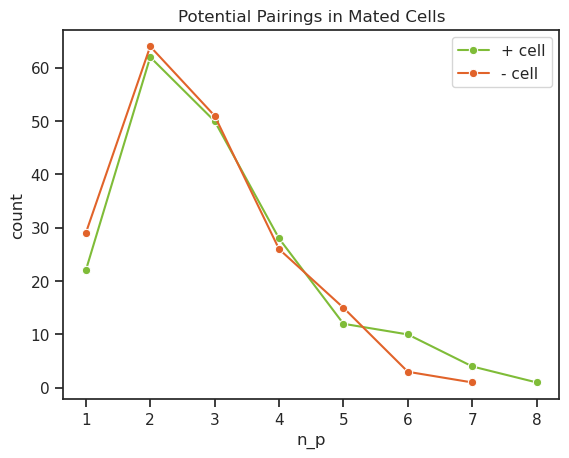

In [119]:
sns.lineplot(neibor_table['n_p'].value_counts(), marker="o", label = "+ cell", c=COLOR_SET2(0))
sns.lineplot(neibor_table['n_m'].value_counts(), marker="o", label = "- cell", c=COLOR_SET2(1))
plt.title("Potential Pairings in Mated Cells")
plt.savefig("./data/saved_figures/potential_pairings.svg", dpi=300)

## 02 angles

In [84]:
# all_obj = pd.concat([all_time['start_m'],all_time['start_p']])
all_obj = all_time['-0']
all_obj = all_obj.reset_index(drop=True)
def norm_angle_index(data):
    data = data%30
    data[data>15] = 30-data[data>15]
    data = data/15
    return data
all_obj["p_angle_index_norm"] = norm_angle_index(all_obj["p_angle_index"])
all_obj["m_angle_index_norm"] = norm_angle_index(all_obj["m_angle_index"])
all_obj = all_obj[['p_id','m_id','p_angle','m_angle','p_angle_index_norm', 'm_angle_index_norm', 'flag','image']]
all_obj = all_obj.drop_duplicates()

In [138]:
data = all_obj[all_obj.flag].copy()
data.loc[data['p_angle_index_norm']<=1/2, 'p_type']='tip'
data.loc[data['p_angle_index_norm']>1/2, 'p_type']='side'
# data.loc[data['p_angle_index_norm']>=2/3, 'p_type']='side'

data.loc[data['m_angle_index_norm']<=1/2, 'm_type']='tip'
data.loc[data['m_angle_index_norm']>1/2, 'm_type']='side'
# data.loc[data['m_angle_index_norm']>=2/3, 'm_type']='side'

In [148]:
data.loc[(data.p_type=="tip") & (data.m_type=="tip"), "mating_shape"]="I"
data.loc[data.p_type != data.m_type, "mating_shape"]="T"
data.loc[(data.p_type=="side") & (data.m_type=="side"), "mating_shape"]="H"

In [153]:
c = [COLOR_SET5.colors[0], COLOR_SET5.colors[4], COLOR_SET5.colors[2], COLOR_SET5.colors[3]]

/home/wd/miniconda3/envs/yeast/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/wd/miniconda3/envs/yeast/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/wd/miniconda3/envs/yeast/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/wd/miniconda3/envs/yeast/lib/python3.10/site-packag

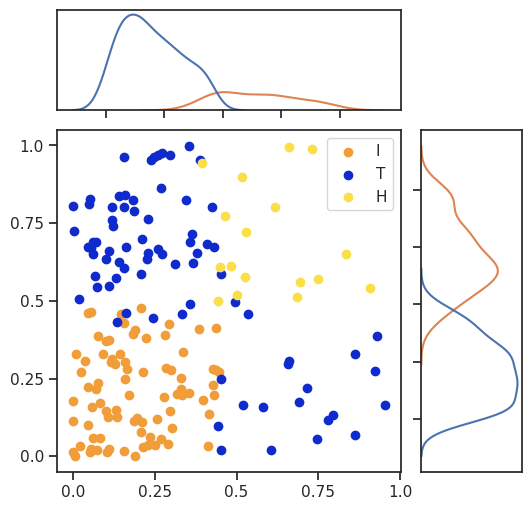

In [269]:
fig8 = plt.figure(constrained_layout=False, figsize=(6, 6))
gs1 = fig8.add_gridspec(nrows=4, ncols=4)
f8_ax1 = fig8.add_subplot(gs1[1:, 0:-1])

f8_ax2 = fig8.add_subplot(gs1[0, 0:-1])
sns.kdeplot(data, x='p_angle', hue="p_type", ax=f8_ax2)
# f8_ax2.axhline(y=0, color='r', linestyle='-')

f8_ax3 = fig8.add_subplot(gs1[1:, -1])
sns.kdeplot(data, y='m_angle', hue="m_type", ax=f8_ax3)

# f8_ax1.axis("off")
# f8_ax2.axis("off")
# f8_ax3.axis("off")

keys=["I", "T", "H"]
for i, key in enumerate(keys):
    show_data = data.loc[data.mating_shape==key]
    f8_ax1.scatter(show_data.p_angle, show_data.m_angle, label=key, c=c[i])
x_range = np.linspace(0,np.pi/2, 5, dtype=np.float_)
x_range_label = np.linspace(0, 1, 5)

f8_ax1.set_xticks(x_range, labels=x_range_label, minor=False)
f8_ax1.set_yticks(x_range, labels=x_range_label, minor=False)
f8_ax1.legend()

f8_ax2.set_xticks(x_range, labels=[])
f8_ax2.set_yticks([])
f8_ax2.set_xlabel("")
f8_ax2.set_ylabel("")
f8_ax2.get_legend().remove()

f8_ax3.set_yticks(x_range, labels=[])
f8_ax3.set_xticks([])
f8_ax3.set_xlabel("")
f8_ax3.set_ylabel("")
f8_ax3.get_legend().remove()
# plt.title("Mating Angle Distribution")
plt.savefig("./data/saved_figures/mating_angle_distribution.svg")
plt.show()

## area ecc trend

In [433]:
data_timepoint= pd.read_csv("../cellmating/run/csv/ecc_trend_1_table.csv")
data_timepoint=data_timepoint[data_timepoint.timepoint > -150]

/home/wd/miniconda3/envs/yeast/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/wd/miniconda3/envs/yeast/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/wd/miniconda3/envs/yeast/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/wd/miniconda3/envs/yeast/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: Whe

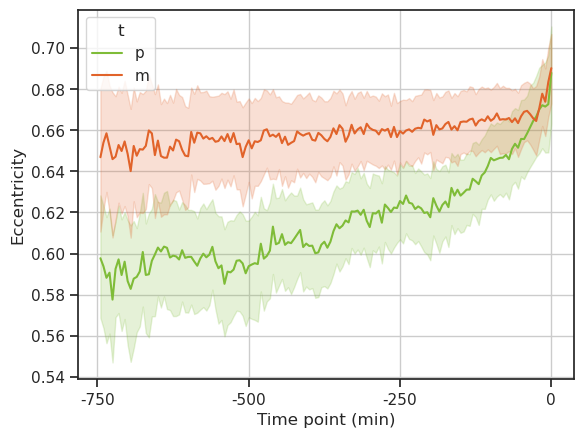

In [441]:
x_range = np.arange(-150, 50, 50)
x_range_label = x_range*5
sns.lineplot(data_timepoint, x="timepoint", y="values", hue="t", estimator='mean', errorbar=('ci', 95), palette=COLOR_SET2.colors)
plt.ylabel("Eccentricity")
plt.xticks(x_range, x_range_label)
# plt.title("Mating cells' eccentricity over time")
plt.xlabel("Time point (min)")
plt.grid(which="major")
plt.savefig("./data/saved_figures/ecc_trend.svg")
plt.show()

In [451]:
data_timepoint_area = pd.read_csv("../cellmating/run/csv/area_trend_table.csv", index_col=0)
data_timepoint_area = data_timepoint_area[data_timepoint_area.timepoint > -160]

/home/wd/miniconda3/envs/yeast/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/wd/miniconda3/envs/yeast/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/wd/miniconda3/envs/yeast/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/wd/miniconda3/envs/yeast/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: Whe

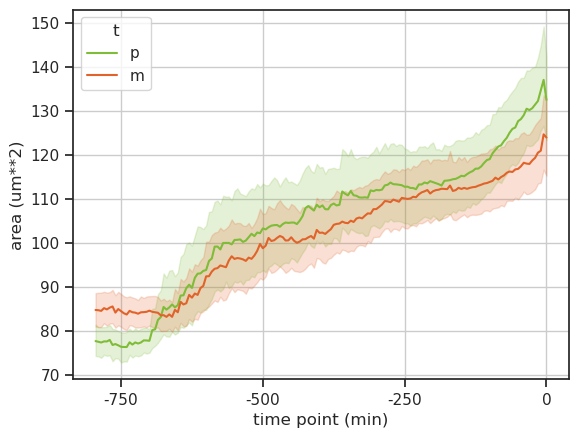

In [453]:
sns.lineplot(data_timepoint_area, x="timepoint", y="values", hue="t", estimator='mean', errorbar=('ci', 95),
            palette=COLOR_SET2.colors)
plt.ylabel("area (um**2)")
plt.xticks(x_range, x_range_label)
plt.xlabel("time point (min)")
plt.grid()
# plt.savefig("./data/saved_figures/area_trend_1.svg")
plt.show()

## distance

In [707]:
data_table = pd.concat([all_time['start_m'],all_time['start_p']])
data_table = data_table.reset_index()

names = all_obj.image.unique()
for i in range(0, len(names)):
    group = data_table[data_table.image == names[i]]
    center_order = (group.center_dist - group.center_dist.min()) / (group.center_dist.max() - group.center_dist.min())
    near_order = (group.nearest_dist - group.nearest_dist.min()) / (group.nearest_dist.max() - group.nearest_dist.min())
    

    data_table.loc[group.index, 'nearest_dist'] = data_table.loc[group.index, 'nearest_dist'] * data_table.loc[group.index, 'resolution'] * data_table.loc[group.index, 'bin']
    data_table.loc[group.index, 'center_dist'] = data_table.loc[group.index, 'center_dist'] * data_table.loc[group.index, 'resolution'] * data_table.loc[group.index, 'bin']
    
    data_table.loc[group.index, 'center_norm'] = center_order
    data_table.loc[group.index, 'center_order'] = (np.argsort(center_order)+1) / len(center_order)
    data_table.loc[group.index, 'near_norm'] = near_order
    data_table.loc[group.index, 'near_order'] = (np.argsort(near_order)+1) / len(near_order)

distance = data_table[["image","nearest_dist","center_dist","near_norm", "center_norm", "center_order","near_order",
                       "flag", "p_neighbor_same", "m_neighbor_same", "p_neighbor_diff", "m_neighbor_diff"]].copy()

distance.loc[distance.center_order<1/3,'order_label'] = '1/3'
distance.loc[(distance.center_order>=1/3) & (distance.near_order<2/3),'order_label'] = '2/3'
distance.loc[distance.center_order>=2/3,'order_label'] = '3/3'

distance = distance[distance.nearest_dist < 20]
index = list(set(distance[~distance.flag].sample(400).index).union(set(distance[distance.flag].index)))
distance = distance.loc[index]
distance.flag = distance.flag.map({True:"mated",False:"non-mathed"})

/home/wd/miniconda3/envs/yeast/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: The behavior of Series.argsort in the presence of NA values is deprecated. In a future version, NA values will be ordered last instead of set to -1.
  return bound(*args, **kwds)
/home/wd/miniconda3/envs/yeast/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: The behavior of Series.argsort in the presence of NA values is deprecated. In a future version, NA values will be ordered last instead of set to -1.
  return bound(*args, **kwds)
/home/wd/miniconda3/envs/yeast/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: The behavior of Series.argsort in the presence of NA values is deprecated. In a future version, NA values will be ordered last instead of set to -1.
  return bound(*args, **kwds)
/home/wd/miniconda3/envs/yeast/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: The behavior of Series.argsort in the prese

In [709]:
data.p_neighbor_diff

1       4
3       1
5       0
7       4
9       4
       ..
1265    2
1266    2
1267    2
1269    3
1271    2
Name: p_neighbor_diff, Length: 783, dtype: int64

/home/wd/miniconda3/envs/yeast/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/wd/miniconda3/envs/yeast/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/wd/miniconda3/envs/yeast/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/wd/miniconda3/envs/yeast/lib/python3.10/site-packag

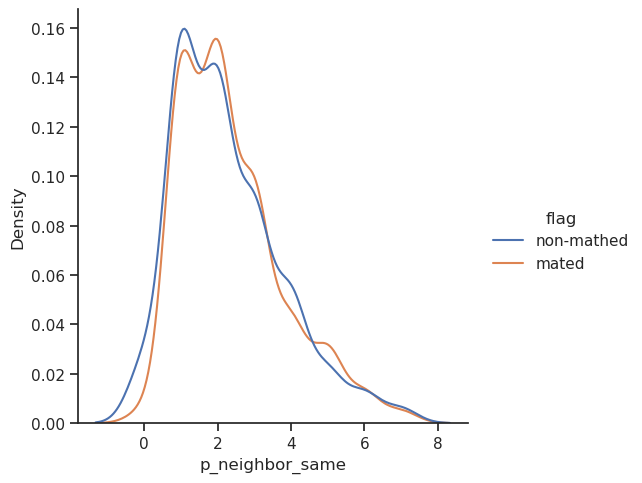

In [721]:
sns.displot(data, x="p_neighbor_same", hue="flag", kind="kde")

/home/wd/miniconda3/envs/yeast/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/wd/miniconda3/envs/yeast/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/wd/miniconda3/envs/yeast/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/wd/miniconda3/envs/yeast/lib/python3.10/site-packag

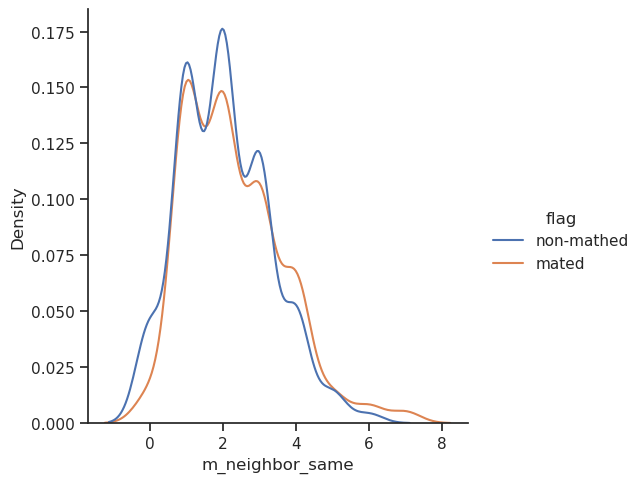

In [720]:
sns.displot(data, x="m_neighbor_same", hue="flag", kind="kde")

/home/wd/miniconda3/envs/yeast/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/wd/miniconda3/envs/yeast/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/wd/miniconda3/envs/yeast/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/wd/miniconda3/envs/yeast/lib/python3.10/site-packag

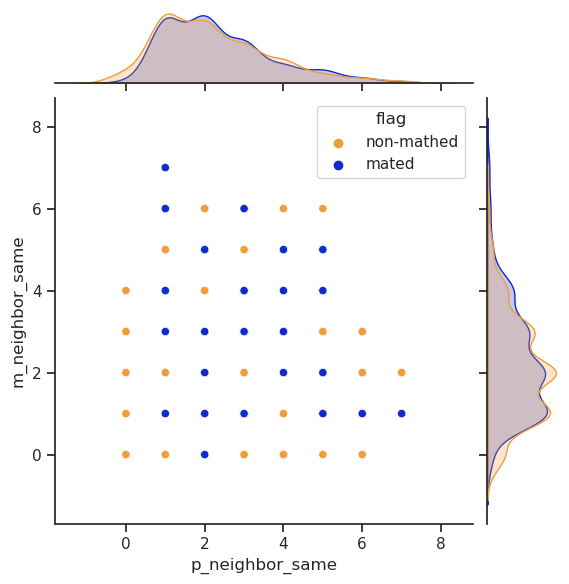

In [726]:
sns.jointplot(data, x='p_neighbor_same', y='m_neighbor_same', hue='flag',
                palette=[COLOR_SET5.colors[0], COLOR_SET5.colors[4]])

<Axes: xlabel='center_dist', ylabel='m_neighbor_diff'>

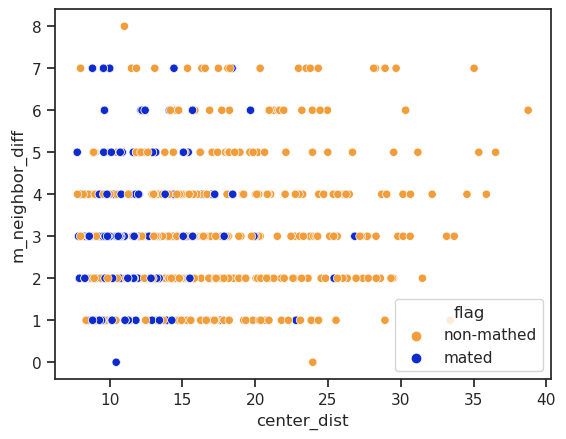

In [712]:
sns.scatterplot(data, x='center_dist', y='m_neighbor_diff', hue='flag',
                palette=[COLOR_SET5.colors[0], COLOR_SET5.colors[4]])

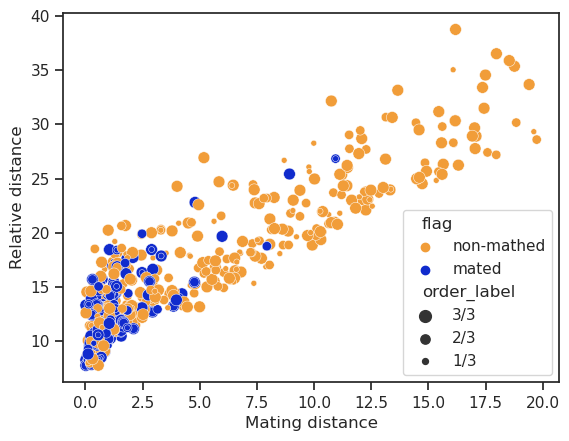

In [728]:
data = distance[distance.nearest_dist < 20]
sns.scatterplot(data, x='nearest_dist', y='center_dist', hue='flag',size='order_label',
                palette=[COLOR_SET5.colors[0], COLOR_SET5.colors[4]])
plt.xlabel("Mating distance")
plt.ylabel("Relative distance")
plt.savefig("./data/saved_figures/distance_order_0.svg")
plt.show()

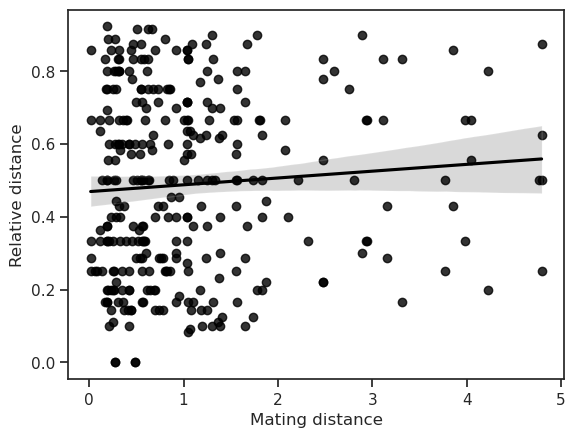

In [742]:
data = distance[distance.nearest_dist < 5]
data = data.loc[data.center_order<1]
data = data.loc[data.flag=="mated"]
sns.regplot(data, x='nearest_dist', y='center_order', color="black")
plt.xlabel("Mating distance")
plt.ylabel("Relative distance")
plt.savefig("./data/saved_figures/distance_order.svg")

## start time

In [621]:
all_obj = pd.DataFrame()
for key in all_time.keys():
    all_obj = pd.concat([all_obj, all_time[key]])

In [628]:
all_obj = all_obj.reset_index(drop=True)
data = all_obj[['p_id','m_id','p_start','m_start','flag','image']]
data = data.drop_duplicates()

# index = list((set(data[~data.flag].sample(200).index)).union(set(data[data.flag].index)))
# data = data.loc[index]

a = data[data.flag].p_start - data[data.flag].m_start
b = data[~data.flag].p_start - data[~data.flag].m_start
s, p = stats.ttest_ind(data[data.flag].p_start, data[data.flag].m_start)
print(s, p)

1.8879143139017156 0.05975382857018524


In [651]:
s, p = stats.ttest_ind(data.p_start, data.m_start)
print(s, p)

3.121058367177606 0.0018204841525218932


/home/wd/miniconda3/envs/yeast/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/wd/miniconda3/envs/yeast/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


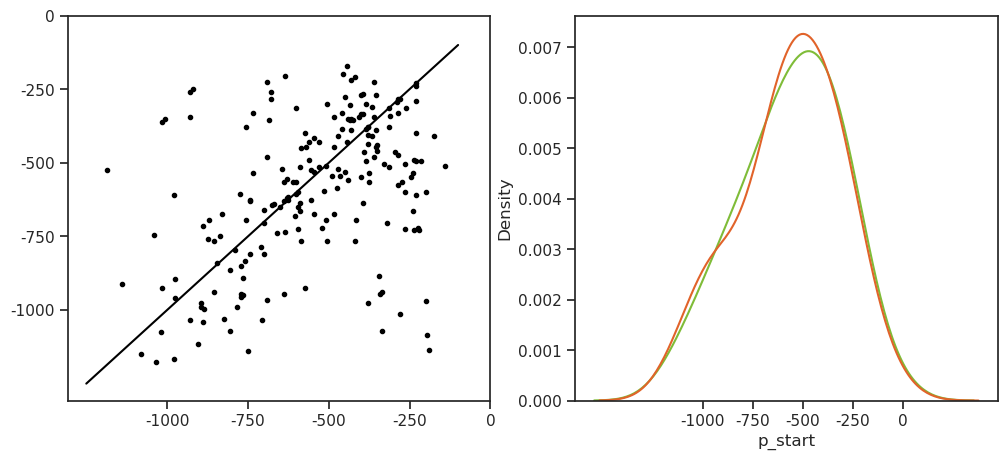

In [652]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].scatter(data[data.flag].p_start, data[data.flag].m_start, marker=".", c='black')
axs[0].plot([-250,-20],[-250,-20], c='black')

sns.kdeplot(data.p_start, ax=axs[1], c=COLOR_SET2.colors[0], bw_adjust=2)
sns.kdeplot(data.m_start+5, ax=axs[1], c=COLOR_SET2.colors[1], bw_adjust=2)

x_range = np.linspace(0, -200, 5, dtype=np.int_)
x_range_label = np.linspace(0, -200, 5, dtype=np.int_)*5

axs[0].set_xticks(x_range, labels=x_range_label, minor=False)
axs[0].set_yticks(x_range, labels=x_range_label, minor=False)
axs[1].set_xticks(x_range, labels=x_range_label, minor=False)


plt.savefig("./data/saved_figures/start_time.svg")

In [4]:
mating_obj = []

In [19]:
import sys
sys.path.append("../")
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import trange

from cellmating.utils import file_traverse, load_from_pkl, dump_to_pkl
from cellmating.io import imread

from script_wlli.mating_feature_extract import extract_mating_features, stack_features

In [20]:
root = "/media/wlli/T7/data/mating_all/"
file_list = file_traverse(root, file_regular=r".*/selected/.*.mating")
print("totle images: ", len(file_list))

totle images:  190


In [21]:
mating_obj = []
for i in trange(0, len(file_list)):
    obj = load_from_pkl(file_list[i])
    mating_obj.append(obj)

100%|█████████████████████████████████████████| 190/190 [01:30<00:00,  2.10it/s]


In [22]:
from script_wlli.utils import load_configs
from script_wlli.mating_feature_extract import set_image_resolution_from_config
config = load_configs("./config_mating.yml")
resolution = pd.DataFrame(file_list, columns=["image"])
resolution = set_image_resolution_from_config(config, resolution)

In [23]:
dataset = None
for i in trange(0, len(mating_obj)):
    c_mate = mating_obj[i]
    for f, c in enumerate([c_mate.p, c_mate.m]):
        axis_major = c_mate.cells[c].axis_major_length_.astype(np.float_)
        axis_minor = c_mate.cells[c].axis_minor_length_.astype(np.float_)
        frames = np.array(c_mate.cells[c].frames) - c_mate.cells[c].end - 1
        name_end = "p" if f==0 else "m"
        data = pd.DataFrame()
        data["length"] = axis_major * resolution.iloc[i]["resolution"] * resolution.iloc[i]["bin"]
        data["frames"] = frames
        data["cell type"] = name_end
        data["flag"] = "axis major"
        data["index"] = i
        dataset = pd.concat([dataset, data])

        data = pd.DataFrame()
        data["length"] = axis_minor * resolution.iloc[i]["resolution"] * resolution.iloc[i]["bin"]
        data["frames"] = frames
        data["cell type"] = name_end
        data["flag"] = "axis minor"
        data["index"] = i
        dataset = pd.concat([dataset, data])

100%|████████████████████████████████████████| 190/190 [00:01<00:00, 104.81it/s]


In [34]:
index = 146
c_mate = load_from_pkl(file_list[index])
print("name: ", file_list[index])
print("m: ", c_mate.m)
print("p: ", c_mate.p)
reso = resolution.iloc[index]["resolution"] * resolution.iloc[index]["bin"]

name:  /media/wlli/T7/data/mating_all/20220903_YAV2104xYAV2105_003/selected/YAV2104xYAV2105_005_19_rigid_003002.mating
m:  9
p:  18


In [35]:
frames_p = np.array(c_mate.cells[c_mate.p].frames) #- c_mate.cells[c_mate.p].end - 1
frames_m = np.array(c_mate.cells[c_mate.m].frames) #- c_mate.cells[c_mate.m].end - 1

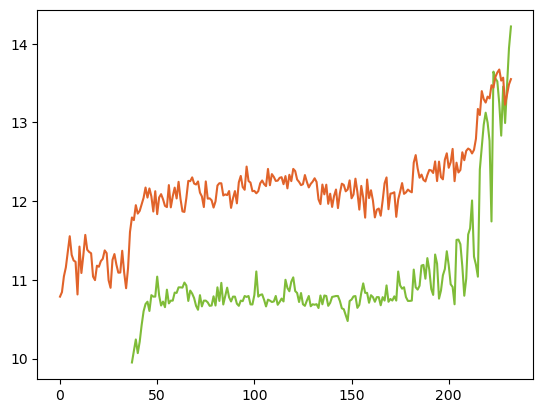

In [36]:
plt.plot(frames_p, c_mate.cells[c_mate.p].axis_major_length_.astype(np.float_) * reso, c=COLOR_SET2.colors[0])
plt.plot(frames_m, c_mate.cells[c_mate.m].axis_major_length_.astype(np.float_) * reso, c=COLOR_SET2.colors[1])

In [33]:
dataset[(dataset.flag == 'axis major') & (dataset['cell type']=='m') & (dataset['frames']<-220)].sort_values("length", ascending=True)

length  frames cell type        flag  index
0   10.468778    -223         m  axis major    176
0   10.787846    -233         m  axis major    146
9   10.815398    -224         m  axis major    146
1   10.845395    -232         m  axis major    146
2   11.045517    -231         m  axis major    146
11  11.088056    -222         m  axis major    146
3   11.158961    -230         m  axis major    146
1   11.206422    -222         m  axis major    176
8   11.230448    -225         m  axis major    146
7   11.247035    -226         m  axis major    146
12  11.314093    -221         m  axis major    146
6   11.318154    -227         m  axis major    146
4   11.353115    -229         m  axis major    146
10  11.423700    -223         m  axis major    146
2   11.474245    -221         m  axis major    176
5   11.555256    -228         m  axis major    146
4   12.061115    -224         m  axis major     82
5   12.076114    -223         m  axis major     82
6   12.089831    -222         m  axis major     82
7   12.184062    -221         m  axis major     82
2   12.384085    -226         m  axis major     82
1   12.447698    -227         m  axis major     82
0   12.520564    -228         m  axis major     82
3   12.768044    -225         m  axis major     82
0   13.239454    -230         m  axis major    153
7   13.315698    -223         m  axis major    153
4   13.338815    -226         m  axis major    153
6   13.516333    -224         m  axis major    153
5   13.537904    -225         m  axis major    153
2   13.543790    -228         m  axis major    153
1   13.546350    -229         m  axis major    153
8   13.620541    -222         m  axis major    153
9   13.775584    -221         m  axis major    153
3   13.921447    -227         m  axis major    153
0   15.416747    -227         m  axis major    100
1   15.772932    -226         m  axis major    100
6   15.803808    -221         m  axis major    100
2   15.846944    -225         m  axis major    100
3   15.971403    -224         m  axis major    100
4   16.079770    -223         m  axis major    100
5   16.094464    -222         m  axis major    100

<Axes: xlabel='frames', ylabel='length'>

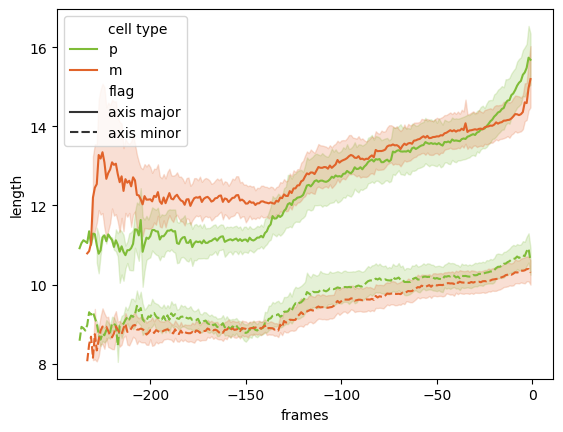

In [27]:
sns.lineplot(dataset, x='frames', y='length', hue="cell type", style="flag", palette=COLOR_SET2.colors)
# plt.ylabel("area (um**2)")
# plt.xticks(x_range, x_range_label)
# plt.xlabel("time point (min)")
# plt.grid()

In [73]:
data

axis_major  axis_minor  frames type
0     50.305300   36.682641    -118    p
1     51.607477   37.305749    -117    p
2     52.660465   35.857573    -116    p
3     52.732863   37.533932    -115    p
4     53.857980   35.800741    -114    p
..          ...         ...     ...  ...
113   66.770440   33.808711      -5    p
114   68.135830   33.393493      -4    p
115   70.419682   33.785741      -3    p
116   70.516948   32.506562      -2    p
117   69.459717   33.348663      -1    p

[118 rows x 4 columns]

In [13]:
frames

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80]

In [11]:
axis

array([26.322775312914874, 26.98079831080531, 26.198376869679997,
       26.313371120777397, 26.119223073231083, 25.96229635654696,
       26.569564545820732, 26.417860806617433, 25.520453161605648,
       25.16914393401423, 26.261939759859985, 26.430149996284523,
       25.454775156907218, 26.621225184449166, 26.763986620102653,
       27.092464985777486, 26.812606617141636, 26.8824384654829,
       27.339408464135722, 26.99008602937672, 27.058511883326887,
       26.629006995919042, 26.629006995919042, 26.311473210556997,
       26.311473210556997, 26.313371120777397, 26.8824384654829,
       27.058007763987447, 27.188552581514948, 26.8824384654829,
       26.621225184449166, 26.311473210556997, 27.188552581514948,
       26.417860806617433, 26.96092883823081, 26.635558957130392,
       26.492256855747648, 26.801743449322608, 26.90790657551499,
       26.801743449322608, 26.86610103062392, 27.03834452783641,
       27.188552581514948, 26.349909837879437, 27.894028743686405,
       27

In [7]:
import sys
sys.path.append("../../")
import os

In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.font_manager
from scipy import stats

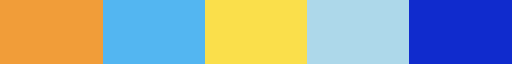

In [87]:
colors = [(241, 157, 57), (83, 182, 241),(250, 223, 75),(173, 216, 234),(16, 43, 205)]
colors_gaudi=[]
for a,b,c in colors:
    colors_gaudi.append((a/255,b/255,c/255))
COLOR_Gaudi = mpl.colors.ListedColormap(colors_gaudi)
COLOR_Gaudi

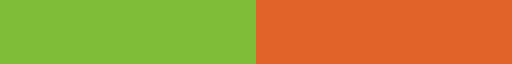

In [91]:
colors_green_red = [(127, 188, 56), (225, 99, 42)]
colors_gaudi=[]
for a,b,c in colors_green_red:
    colors_gaudi.append((a/255,b/255,c/255))
colors_green_red = mpl.colors.ListedColormap(colors_gaudi)
colors_green_red

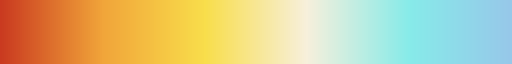

In [4]:
colors_list = [(202, 58, 32),(241, 165, 58), (249, 222, 75),(247, 240, 220), (135, 235, 233),(151, 200, 233),]
colors_gaudi_list=[]
for a,b,c in colors_list:
    colors_gaudi_list.append((a/255,b/255,c/255))
COLOR_Gaudi_line = mpl.colors.LinearSegmentedColormap.from_list("", colors_gaudi_list)
COLOR_Gaudi_line

In [5]:
color_red = np.array([202, 58, 32])/255
color_green = np.array([128, 186, 56])/255

In [6]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 12,
       'serif': ['Arial', 'Computer Modern Sans Serif', 'DejaVu Sans',]}
axes = {'edgecolor': 'black',
        'linewidth': '1',
       'facecolor': 'white'}
mpl.rc('font', **font)
mpl.rc('axes', **axes)
#axes.edgecolor:     black   # axes edge color
#axes.linewidth:     0.8     # edge line width

In [521]:
data_table = pd.concat([all_time['start_m'],all_time['start_p']])
data_table = data_table.reset_index()
names = all_obj.image.unique()
for i in range(0, len(names)):
    group = data_table[data_table.image == names[i]]
    center_order = (group.center_dist - group.center_dist.min()) / (group.center_dist.max() - group.center_dist.min())
    near_order = (group.nearest_dist - group.nearest_dist.min()) / (group.nearest_dist.max() - group.nearest_dist.min())
    
    k = find_key(names[i])
    if k is None:
        v = {'reso': 0.12960, 'bin': 2}
    else:
        v = k[1]
    data_table.loc[group.index, 'nearest_dist'] = data_table.loc[group.index, 'nearest_dist']*v['reso']*v['bin']
    data_table.loc[group.index, 'center_dist'] = data_table.loc[group.index, 'center_dist']*v['reso']*v['bin']
    
    data_table.loc[group.index, 'center_norm'] = center_order
    data_table.loc[group.index, 'center_order'] = (np.argsort(center_order)+1) / len(center_order)
    data_table.loc[group.index, 'near_norm'] = near_order
    data_table.loc[group.index, 'near_order'] = (np.argsort(near_order)+1) / len(near_order)

distance = data_table[["image","nearest_dist","center_dist","near_norm", "center_norm", "center_order","near_order","flag"]].copy()

distance.loc[distance.center_order<1/3,'order_label'] = '1/3'
distance.loc[(distance.center_order>=1/3) & (distance.near_order<2/3),'order_label'] = '2/3'
distance.loc[distance.center_order>=2/3,'order_label'] = '3/3'

distance = distance[distance.nearest_dist < 20]
index = list(set(distance[~distance.flag].sample(400).index).union(set(distance[distance.flag].index)))
distance = distance.loc[index]
distance.flag = distance.flag.map({True:"mated",False:"non-mathed"})

In [ ]:
distance

/tmp/ipykernel_3937/2834615886.py:2: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(data, x='nearest_dist', y='center_dist', hue='flag',size='order_label',palette=colors_gaudi)


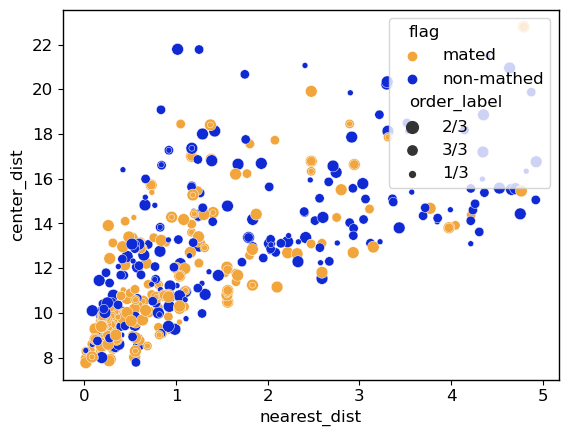

In [532]:
data = distance[distance.nearest_dist < 5]
sns.scatterplot(data, x='nearest_dist', y='center_dist', hue='flag',size='order_label',palette=colors_gaudi)
# plt.savefig("/media/wd/T7/data/mating_all/figs/distance_vs_order.png")
plt.savefig("./figs/distance_less5.svg")
plt.show()

/home/wd/miniconda3/envs/deepyeast/lib/python3.9/site-packages/seaborn/axisgrid.py:1826: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
/home/wd/miniconda3/envs/deepyeast/lib/python3.9/site-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/home/wd/miniconda3/envs/deepyeast/lib/python3.9/site-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


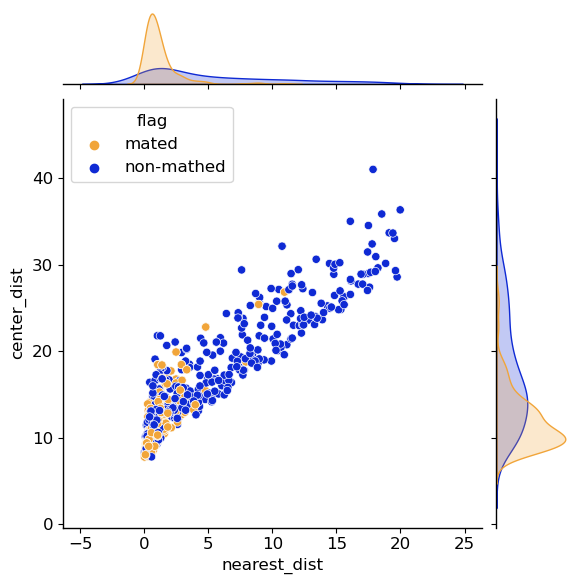

In [524]:
data = distance
sns.jointplot(data, x='nearest_dist', y='center_dist', hue="flag",palette=colors_gaudi )
plt.savefig("./figs/distance_all.svg")

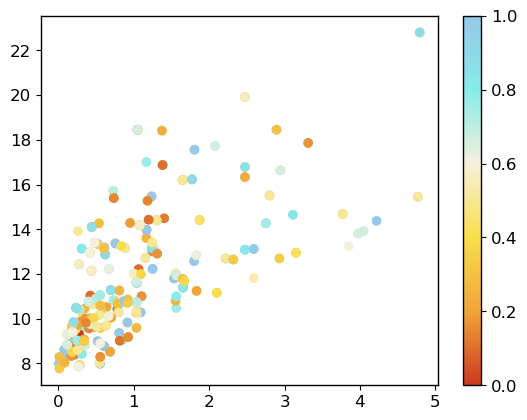

In [542]:
data = data[data.flag=='mated']
plt.scatter(x=data['nearest_dist'], y=data['center_dist'],c=data['center_order'],cmap=COLOR_Gaudi_line)
plt.colorbar()
plt.savefig("./figs/distance_mated_less5.svg")


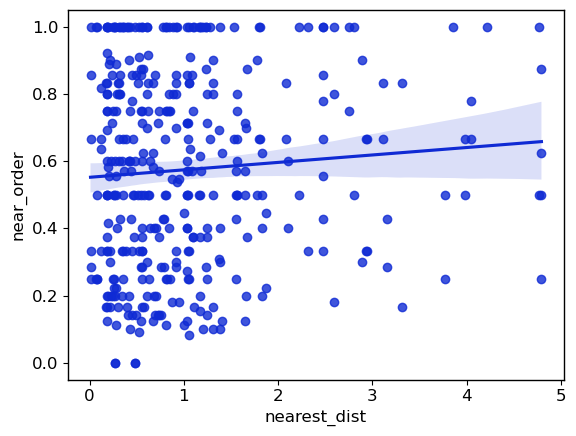

In [541]:
sns.regplot(data, x='nearest_dist', y='near_order', color=colors_gaudi[1])
plt.savefig("figs/distance_order.svg")

Text(0.5, 1.0, 'anlge t=None')

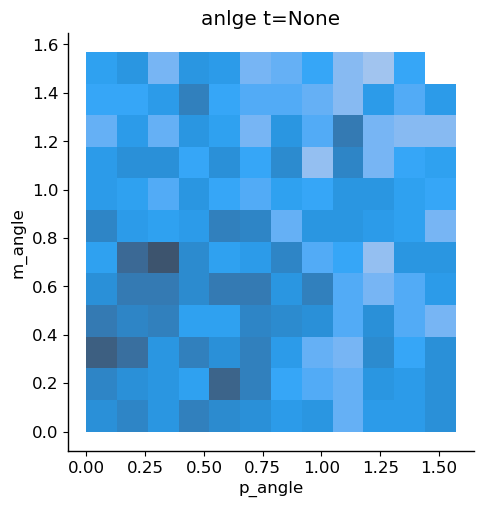

In [543]:
sns.displot(x=all_obj.p_angle, y=all_obj.m_angle)
plt.title(f"anlge t={k}")
# plt.savefig('index_pairs_'+k+'.svg')

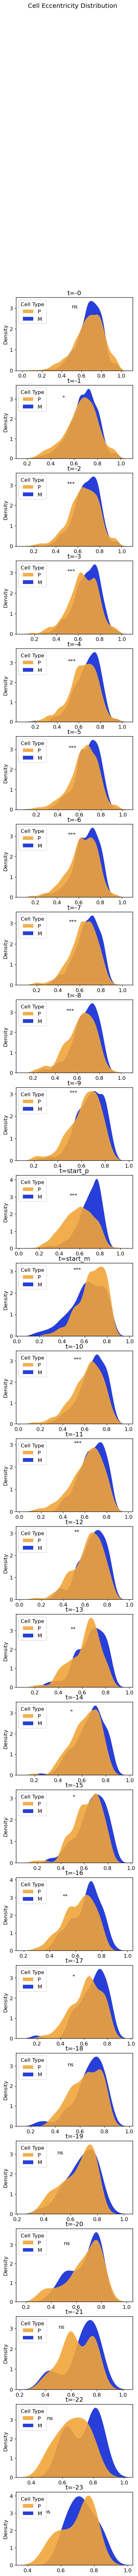

In [65]:
length = len(all_time.keys())
fig, axs = plt.subplots(length,1,figsize=(4*1.2, 3*1.2*length))
for i, k in enumerate(all_time.keys()):
    all_obj = all_time[k]
    all_obj = all_obj.reset_index(drop=True)
    if all_obj.shape[0]>0:
        data_p = all_obj[['p','p_eccentricity', 'image']].drop_duplicates()
        data_m = all_obj[['m','m_eccentricity', 'image']].drop_duplicates()
        g = sns.kdeplot(
           [data_p.p_eccentricity.rename("P"), data_m.m_eccentricity.rename("M")],
           fill=True, common_norm=False, palette=colors_gaudi[:2],
           alpha=0.9, linewidth=0,bw_adjust=0.8, ax=axs[i]
        )
        s,p = stats.ttest_ind(data_p.p_eccentricity, data_m.m_eccentricity)
        if p > 0.05:
            axs[i].text(0.5, 3, "ns")
        elif p > 0.01:
            axs[i].text(0.5, 3, "*")
        elif p > 0.001:
            axs[i].text(0.5, 3, "**")
        else:
            axs[i].text(0.5, 3, "***")
        sns.move_legend(g, "upper left", title='Cell Type')
        axs[i].set_title(f"t={k}")
        # plt.legend(loc='upper left')
fig.suptitle("Cell Eccentricity Distribution")
plt.savefig('Cell_Eccentricity_Distribution_'+k+'.svg')
plt.show()

/tmp/ipykernel_4545/415399124.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  g = sns.kdeplot(
/tmp/ipykernel_4545/415399124.py:15: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  s,p = stats.ttest_ind(data_p.p_eccentricity, data_m.m_eccentricity)
/home/wd/miniconda3/envs/deepyeast/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1250: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/home/wd/miniconda3/envs/deepyeast/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1250: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


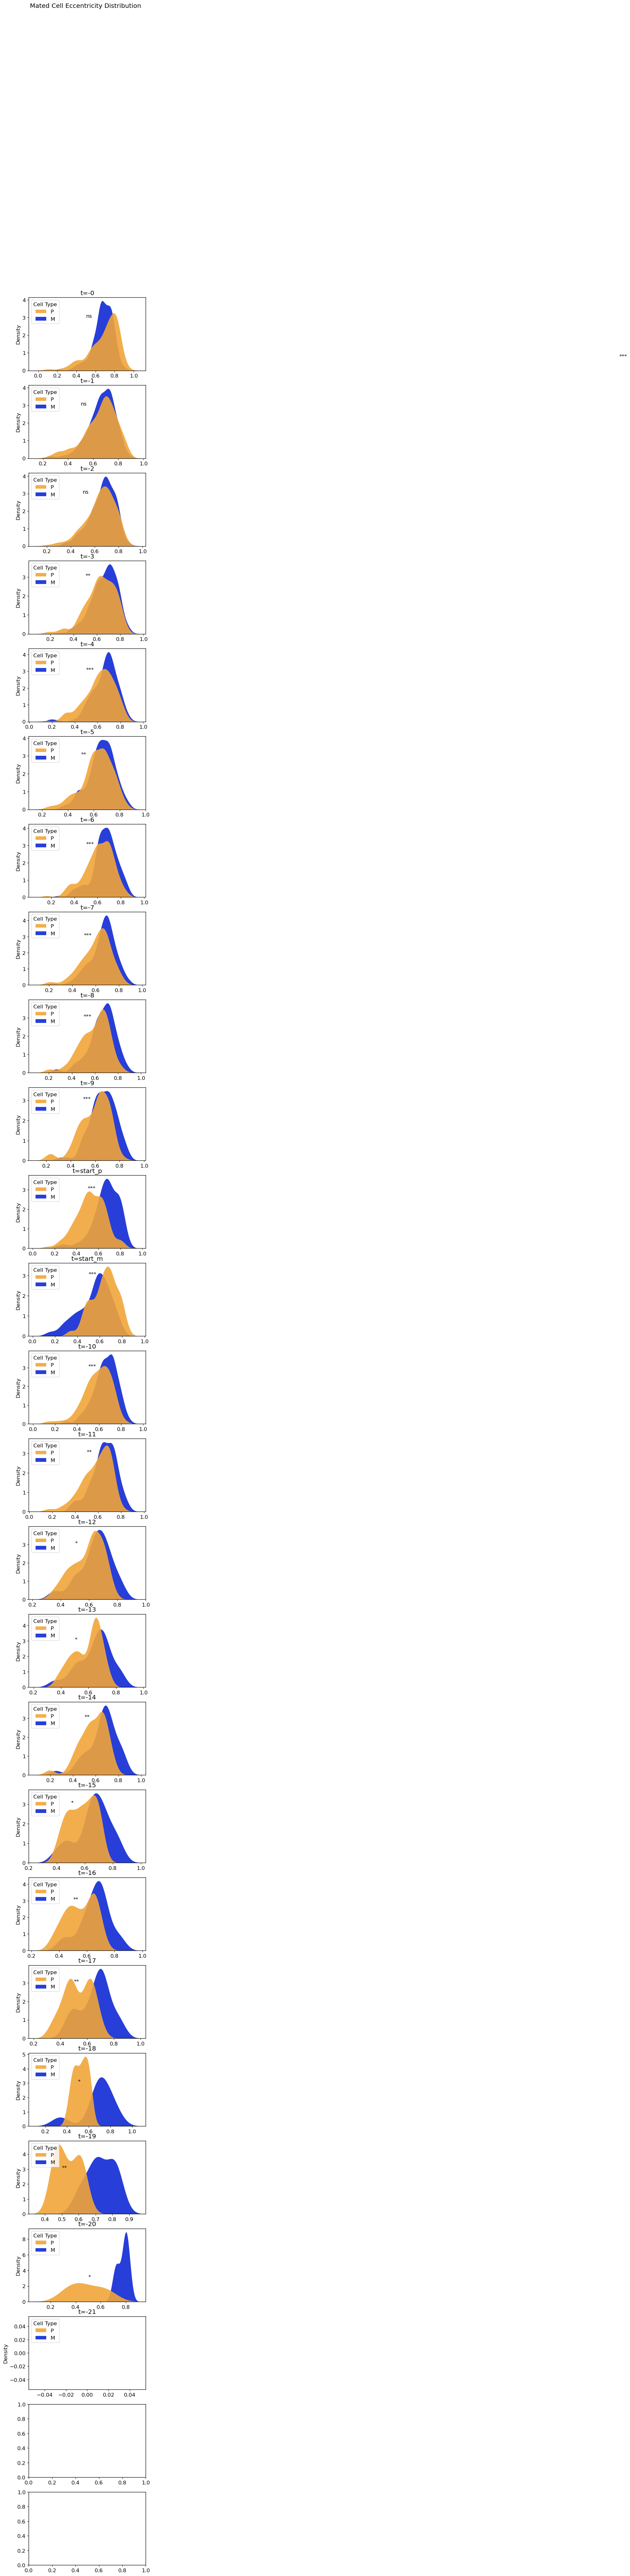

In [67]:
length = len(all_time.keys())
fig, axs = plt.subplots(length,1,figsize=(4*1.2, 3*1.2*length))
for i, k in enumerate(all_time.keys()):
    all_obj = all_time[k]
    all_obj = all_obj.reset_index(drop=True)
    all_obj = all_obj[all_obj.flag]
    if all_obj.shape[0]>0:
        data_p = all_obj[['p','p_eccentricity', 'image']].drop_duplicates()
        data_m = all_obj[['m','m_eccentricity', 'image']].drop_duplicates()
        g = sns.kdeplot(
           [data_p.p_eccentricity.rename("P"), data_m.m_eccentricity.rename("M")],
           fill=True, common_norm=False, palette=colors_gaudi[:2],
           alpha=0.9, linewidth=0,bw_adjust=0.8, ax=axs[i]
        )
        s,p = stats.ttest_ind(data_p.p_eccentricity, data_m.m_eccentricity)
        if p > 0.05:
            axs[i].text(0.5, 3, "ns")
        elif p > 0.01:
            axs[i].text(0.5, 3, "*")
        elif p > 0.001:
            axs[i].text(0.5, 3, "**")
        else:
            axs[i].text(0.5, 3, "***")
        sns.move_legend(g, "upper left", title='Cell Type')
        axs[i].set_title(f"t={k}")
        # plt.legend(loc='upper left')
fig.suptitle("Mated Cell Eccentricity Distribution")
plt.savefig('mated_Cell_Eccentricity_Distribution_'+k+'.svg')
plt.show()

In [604]:
all_obj = pd.concat([all_time["start_p"],all_time["start_m"]])
all_obj = all_obj.reset_index(drop=True)
# all_obj = all_time['-0']
data = all_obj[['p','m','p_start','m_start','flag','image']]
data = data.drop_duplicates()

index = list(set(data[~data.flag].sample(300).index).union(set(data[data.flag].index)))
data = data.loc[index]

In [601]:
a = data[data.flag].p_start - data[data.flag].m_start
b = data[~data.flag].p_start - data[~data.flag].m_start
s,p = stats.ttest_ind(data.p_start, data.m_start)
print(s, p)

2.643224826978582 0.008340231913463975


In [605]:
s,p = stats.ttest_ind(data[data.flag].p_start, data[data.flag].m_start)
print(s, p)

1.7760938000395885 0.07647378018186347


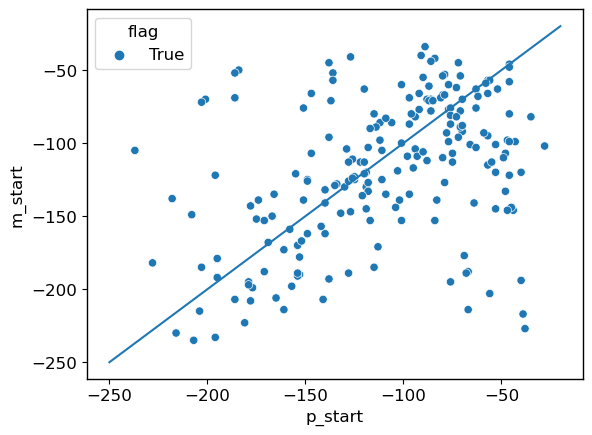

In [607]:
sns.scatterplot(data[data.flag], x='p_start', y='m_start', hue='flag')

plt.plot([-250,-20],[-250,-20])

6.665338645418327

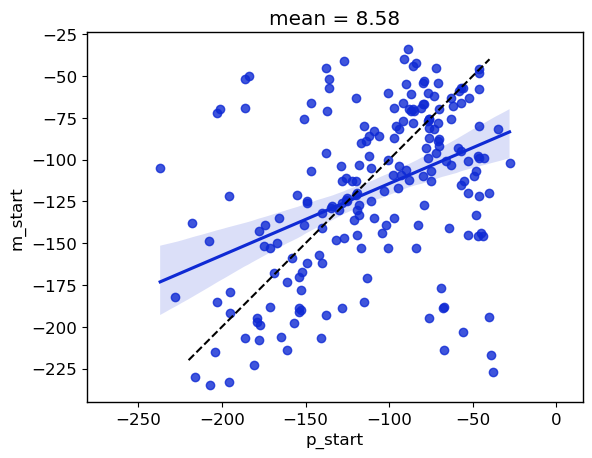

In [659]:
mated = data[data.flag]
# sns.scatterplot(mated, x='p_start',y='m_start',hue='flag',palette=colors_gaudi)
sns.regplot(mated, x='p_start', y='m_start', color=colors_gaudi[1],ci=95, line_kws=dict(color=colors_gaudi[1]),)

plt.plot([-220,-40],[-220,-40],'--',c='black',)
plt.title(f'mean = {np.mean(mated.p_start - mated.m_start):0.3}')
plt.axis('equal')
plt.savefig("./figs/fusion_time_m_first.svg")

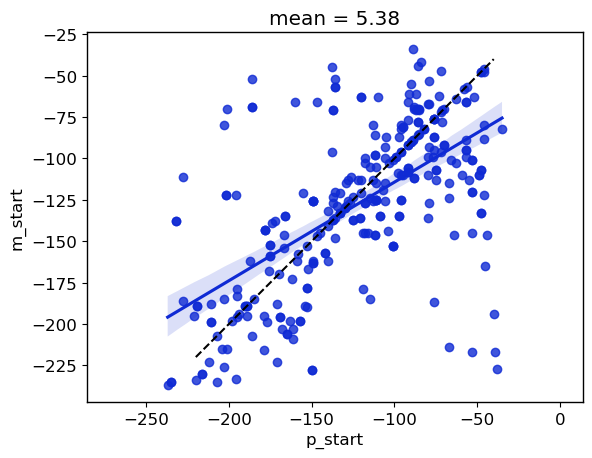

In [660]:
mated = data[~data.flag]
# sns.scatterplot(mated, x='p_start',y='m_start',hue='flag',palette=colors_gaudi)
sns.regplot(mated, x='p_start', y='m_start', color=colors_gaudi[1],ci=95, line_kws=dict(color=colors_gaudi[1]),)

plt.plot([-220,-40],[-220,-40],'--',c='black',)
plt.title(f'mean = {np.mean(mated.p_start - mated.m_start):0.3}')
plt.axis('equal')
plt.savefig("./figs/no_fusion_time_m_first.svg")

In [699]:
all_obj

p   m  p_type  m_type  p_start  p_area     p_axis  p_eccentricity  \
0     57  28       1       2     -101   619.0  35.867525        0.776547   
1     57  59       1       2     -101   619.0  35.867525        0.776547   
2     23  59       1       2     -118   760.0  39.528561        0.783037   
3     51  59       1       2     -107   544.0  27.946717        0.454279   
4     52  59       1       2     -107   486.0  26.893912        0.514029   
...   ..  ..     ...     ...      ...     ...        ...             ...   
1225  19  10       1       2     -118  1754.0  69.459717        0.877205   
1226   5  10       1       2     -127  1628.0  60.154919        0.815060   
1227   7  10       1       2     -127  1796.0  60.496434        0.778493   
1228  19  10       1       2     -118  1754.0  69.459717        0.877205   
1229  27  10       1       2      -45  4310.0  94.811169        0.719860   

      m_start  m_area  ...  p_angle_index  m_angle_index  center_dist  \
0        -118   887.0  ...             21             18    59.252799   
1        -100   500.0  ...              3             53    31.810915   
2        -100   500.0  ...              1             45    33.076115   
3        -100   500.0  ...             31              4    33.901114   
4        -100   500.0  ...             32             59    40.221602   
...       ...     ...  ...            ...            ...          ...   
1225     -127  1117.0  ...             53             15    51.523168   
1226     -127  1117.0  ...             57              4    50.319042   
1227     -127  1117.0  ...             57             10    72.758545   
1228     -127  1117.0  ...             53             15    51.523168   
1229     -127  1117.0  ...              3             25    72.077715   

      nearest_dist   flag  time_measure  time_0  ref  \
0        32.823224  False           117     118   57   
1         0.735164   True           117     118   57   
2         2.761008  False           117     118   59   
3         6.030119  False           117     118   59   
4        12.745751  False           117     118   59   
...            ...    ...           ...     ...  ...   
1225      6.298353   True           126     127   19   
1226      2.979767  False           126     127   10   
1227     24.804708  False           126     127   10   
1228      6.298353   True           126     127   10   
1229      4.450931  False           126     127   10   

                                                  image  ref_type  
0     20220802_YAV2104xYAV2105_001_01_R3D_REF_rigid_...         p  
1     20220802_YAV2104xYAV2105_001_01_R3D_REF_rigid_...         p  
2     20220802_YAV2104xYAV2105_001_01_R3D_REF_rigid_...         m  
3     20220802_YAV2104xYAV2105_001_01_R3D_REF_rigid_...         m  
4     20220802_YAV2104xYAV2105_001_01_R3D_REF_rigid_...         m  
...                                                 ...       ...  
1225       20230315_h90_hpm_03_08_R3D._rigid_004003.tif         p  
1226       20230315_h90_hpm_03_08_R3D._rigid_004003.tif         m  
1227       20230315_h90_hpm_03_08_R3D._rigid_004003.tif         m  
1228       20230315_h90_hpm_03_08_R3D._rigid_004003.tif         m  
1229       20230315_h90_hpm_03_08_R3D._rigid_004003.tif         m  

[1230 rows x 26 columns]

In [820]:
all_obj = pd.concat([all_time["start_p"],all_time["start_m"],all_time["-0"],all_time["-1"],all_time["-2"]])
# all_obj = all_time['-0']
all_obj = all_obj.reset_index(drop=True)

all_obj.loc[all_obj.ref == all_obj.p, 'ref_type'] = 'p'
all_obj.loc[all_obj.ref == all_obj.m, 'ref_type'] = 'm'
# all_obj = all_time['-0']
data = all_obj[['p','m','neighbor_p','neighbor_m','flag','ref_type','image']]
data = data.drop_duplicates()

# index = list(set(data[~data.flag].sample(300).index).union(set(data[data.flag].index)))
# data = data.loc[index]
# data = data.drop_duplicates()

/home/wd/miniconda3/envs/deepyeast/lib/python3.9/site-packages/seaborn/axisgrid.py:1826: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
/home/wd/miniconda3/envs/deepyeast/lib/python3.9/site-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/home/wd/miniconda3/envs/deepyeast/lib/python3.9/site-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


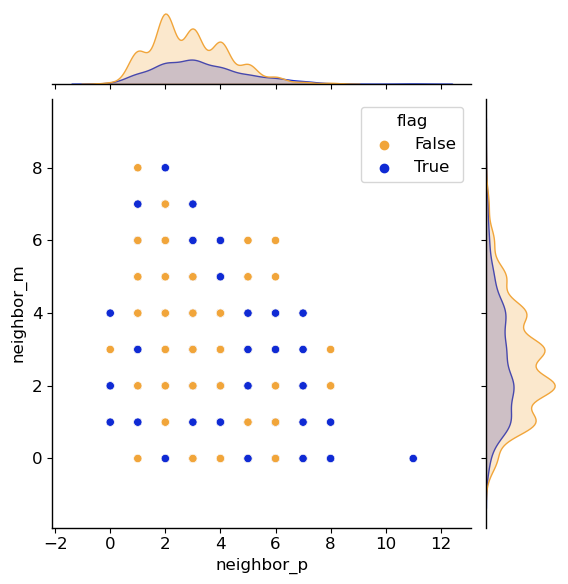

In [821]:
sns.jointplot(data[data.ref_type=='p'], x='neighbor_p', y='neighbor_m', hue="flag", palette=colors_gaudi )

1.3505703822514157e-05


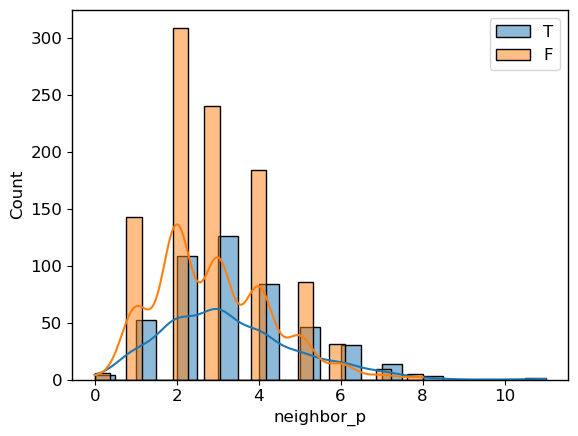

In [830]:
data_1 = data[(data.ref_type == 'p')]
a = data_1[data_1.flag].neighbor_p
b = data_1[~data_1.flag].neighbor_p
sns.histplot(a, label="T", kde=True)
sns.histplot(b, label="F", kde=True)
s,p = stats.ttest_ind(a, b)
print(p)
plt.legend()

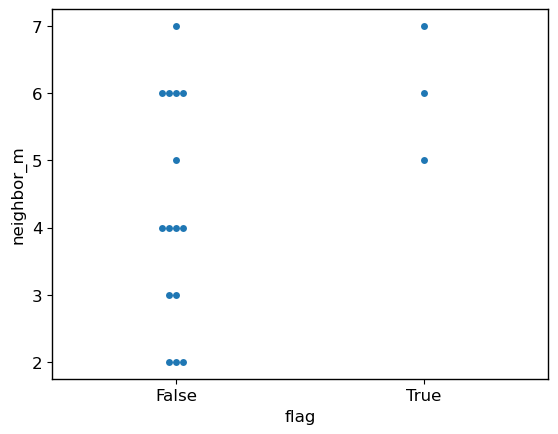

In [831]:
data_1 = data[data.image==img[20]]
sns.swarmplot(data=data_1[data_1.ref_type=='p'], x="flag", y="neighbor_m",)
plt.show()

In [667]:
all_obj = pd.concat([all_time['start_m'],all_time['start_p']])
# all_obj = all_time['-0']

In [833]:
all_obj.keys()

Index(['p', 'm', 'p_type', 'm_type', 'p_start', 'p_area', 'p_axis',
       'p_eccentricity', 'm_start', 'm_area', 'm_axis', 'm_eccentricity',
       'neighbor_m', 'neighbor_p', 'p_angle', 'm_angle', 'p_angle_index',
       'm_angle_index', 'center_dist', 'nearest_dist', 'flag', 'time_measure',
       'time_0', 'ref', 'image', 'ref_type'],
      dtype='object')

In [1119]:
data_table = pd.concat([all_time['start_m'],all_time['start_p']])
# data_table = all_obj = all_time['-0']
data_table = data_table.reset_index()
names = all_obj.image.unique()
for i in range(0, len(names)):
    group = data_table[data_table.image == names[i]]
    center_order = (group.center_dist - group.center_dist.min()) / (group.center_dist.max() - group.center_dist.min())
    near_order = (group.nearest_dist - group.nearest_dist.min()) / (group.nearest_dist.max() - group.nearest_dist.min())
    
    k = find_key(names[i])
    if k is None:
        v = {'reso': 0.12960, 'bin': 2}
    else:
        v = k[1]
    data_table.loc[group.index, 'nearest_dist'] = data_table.loc[group.index, 'nearest_dist']*v['reso']*v['bin']
    data_table.loc[group.index, 'center_dist'] = data_table.loc[group.index, 'center_dist']*v['reso']*v['bin']
    data_table.loc[group.index, 'm_area'] = data_table.loc[group.index, 'm_area']*(v['reso']**2)*(v['bin']**2)
    data_table.loc[group.index, 'p_area'] = data_table.loc[group.index, 'p_area']*(v['reso']**2)*(v['bin']**2)
    data_table.loc[group.index, 'p_area'] = data_table.loc[group.index, 'p_area']*(v['reso']**2)*(v['bin']**2)
    data_table.loc[group.index, 'p_axis'] = data_table.loc[group.index, 'p_axis']*v['reso']*v['bin']
    data_table.loc[group.index, 'm_axis'] = data_table.loc[group.index, 'm_axis']*v['reso']*v['bin']
    
    data_table.loc[group.index, 'center_norm'] = center_order
    data_table.loc[group.index, 'center_order'] = (np.argsort(center_order)+1) / len(center_order)
    data_table.loc[group.index, 'near_norm'] = near_order
    data_table.loc[group.index, 'near_order'] = (np.argsort(near_order)+1) / len(near_order)

# data_table = data_table.drop_duplicates(subset = ['p','m','time_0', 'image'])

In [1120]:
colums = ["p", "m", "p_start", 'p_area', 'p_axis', 'p_eccentricity',
          "m_start", 'm_area', 'm_axis', 'm_eccentricity',
          "p_angle", "p_angle_index", "m_angle", "m_angle_index",
          "nearest_dist", "center_dist", "near_norm", "center_norm", "center_order", "near_order",
         "neighbor_m", "neighbor_p", "time_measure", "image", "flag"]

In [1121]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
data = data_table[colums]
data = data.dropna()
X = data.iloc[:,2:-3]
Y = data["flag"]*1

In [1122]:
scaler = preprocessing.StandardScaler().fit(X)
StandardScaler()
X_scaled = scaler.transform(X)

<Axes: >

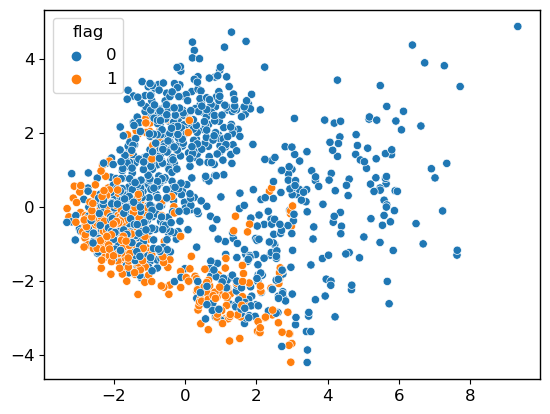

In [1123]:
pca= PCA(n_components=2, svd_solver='full')
fit = pca.fit(X_scaled)
X_trans = fit.fit_transform(X_scaled)
sns.scatterplot(x=X_trans[:,0], y=X_trans[:,1],hue=Y)

In [1124]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
clf = make_pipeline(StandardScaler(), SVC(gamma='auto', probability=True))
svc = clf.fit(X_scaled, Y)
pred = svc.predict(X_scaled)
score = np.max(svc.predict_proba(X_scaled),axis=1)

/tmp/ipykernel_3937/2822316348.py:2: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=X_trans[:,0], y=X_trans[:,1],palette=colors_gaudi, hue=Y,ax=axs[0])
/tmp/ipykernel_3937/2822316348.py:3: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=X_trans[:,0], y=X_trans[:,1],palette=colors_gaudi, hue=pred, ax=axs[1])


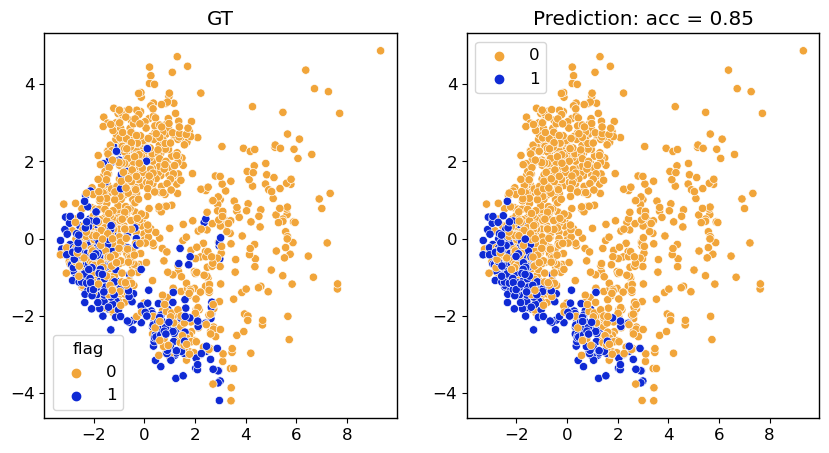

In [1126]:
fig,axs = plt.subplots(1,2, figsize=(10,5))
sns.scatterplot(x=X_trans[:,0], y=X_trans[:,1],palette=colors_gaudi, hue=Y,ax=axs[0])
sns.scatterplot(x=X_trans[:,0], y=X_trans[:,1],palette=colors_gaudi, hue=pred, ax=axs[1])
axs[0].set_title("GT")
axs[1].set_title(f"Prediction: acc = {accuracy_score(Y, pred):0.3}")
# plt.savefig("./figs/prediction.svg")
plt.show()

In [1134]:
i = 39
index = data[data.image == img[i]].index
print(img[i])
pred_data = data.loc[index, ["p","m","flag"]]
pred_data["pred"] = pred[index]
pred_data["score"] = score[index]
pred_data.dropna()

20220802_YAV2104xYAV2105_001_10_R3D_REF_rigid_004002.tif


p   m   flag  pred     score
200  17  27  False     0  0.942481
201  24  27  False     0  0.901255
202  30  27  False     0  0.934845
203  31  27  False     0  0.947621
204  32  27  False     0  0.867555
726  48  27   True     0  0.933070
727  17  27  False     0  0.936886
728  24  27  False     0  0.869614
729  30  27  False     1  0.658099
730  31  27  False     0  0.824803
731  32  27  False     0  0.920080
732  48  27   True     0  0.882356
733  49  27  False     0  0.925166

/tmp/ipykernel_3937/3197095358.py:2: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=X_trans[index,0], y=X_trans[index,1],palette=colors_gaudi, hue=Y[index],ax=axs[0])
/tmp/ipykernel_3937/3197095358.py:3: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=X_trans[index,0], y=X_trans[index,1],palette=colors_gaudi, hue=pred[index], ax=axs[1])


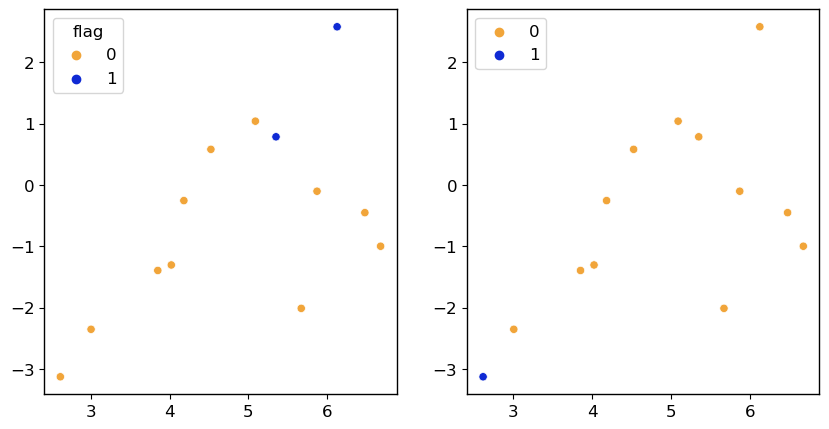

In [1135]:
fig,axs = plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(x=X_trans[index,0], y=X_trans[index,1],palette=colors_gaudi, hue=Y[index],ax=axs[0])
sns.scatterplot(x=X_trans[index,0], y=X_trans[index,1],palette=colors_gaudi, hue=pred[index], ax=axs[1])
plt.show()

0.8501152959262106

In [47]:
def norm_angle_index(data):
    data = data%30
    data[data>15] = 30-data[data>15]
    data = data/15
    return data

In [50]:
for k in all_time.keys():
    all_obj = all_time[k]
    all_obj = all_obj.reset_index(drop=True)
    all_obj["p_angle_index_norm"] = norm_angle_index(all_obj["p_angle_index"])
    all_obj["m_angle_index_norm"] = norm_angle_index(all_obj["m_angle_index"])

/home/wd/miniconda3/envs/deepyeast/lib/python3.9/site-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


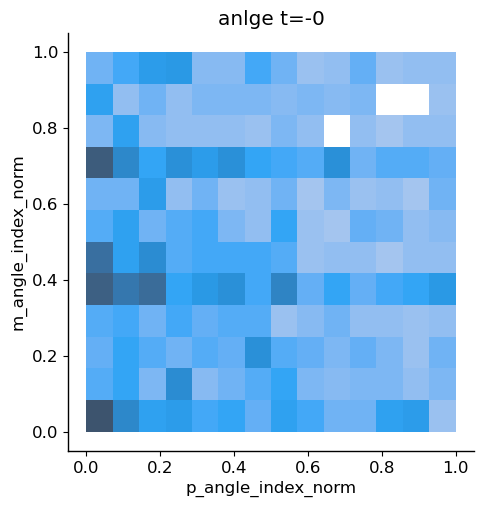

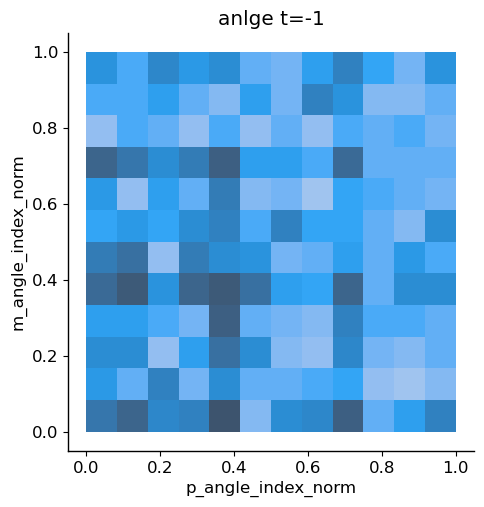

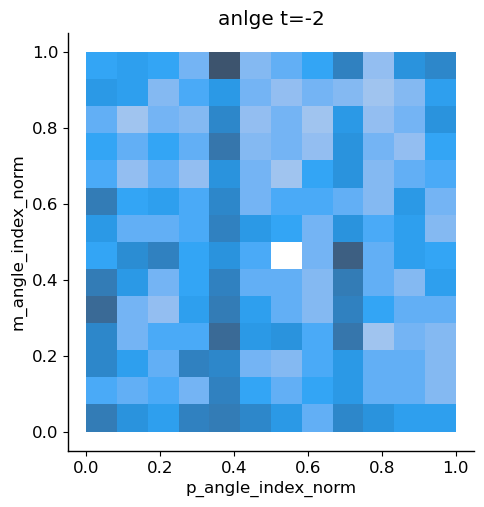

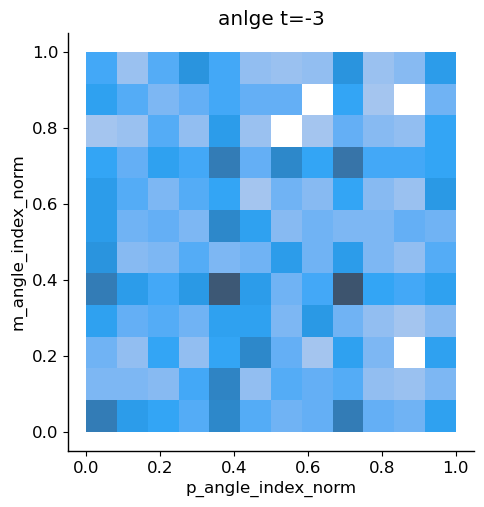

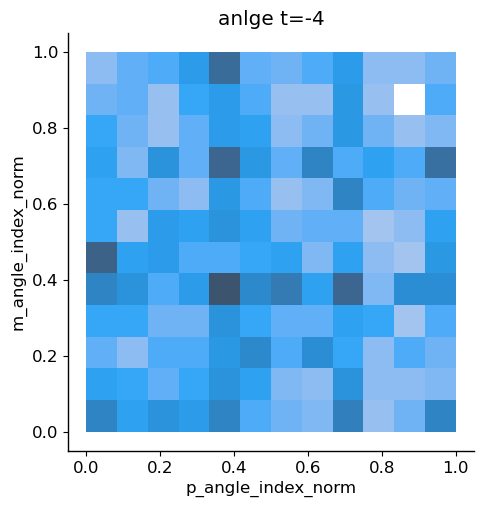

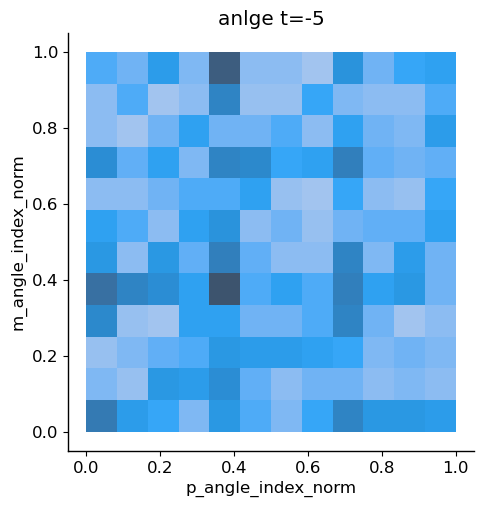

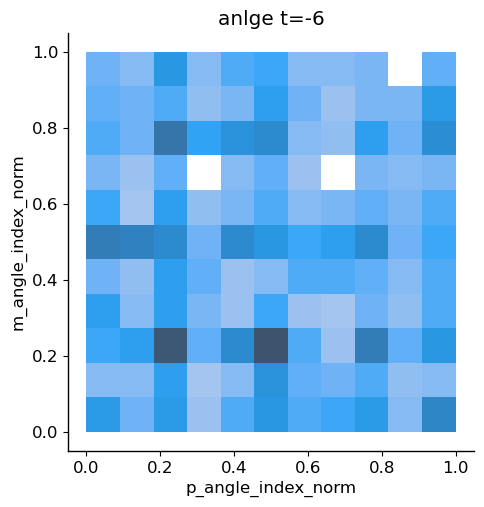

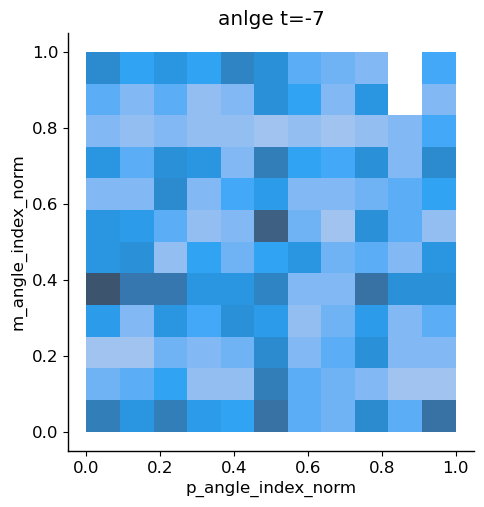

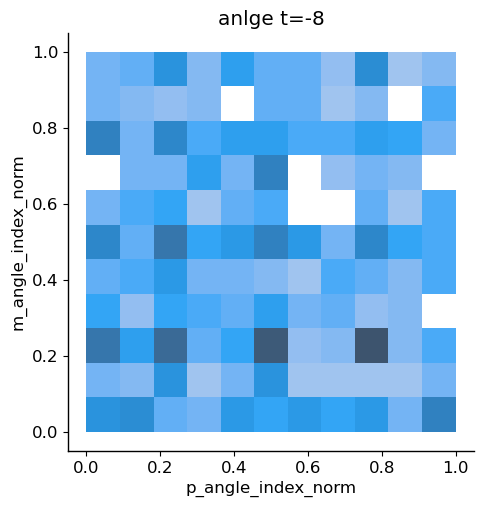

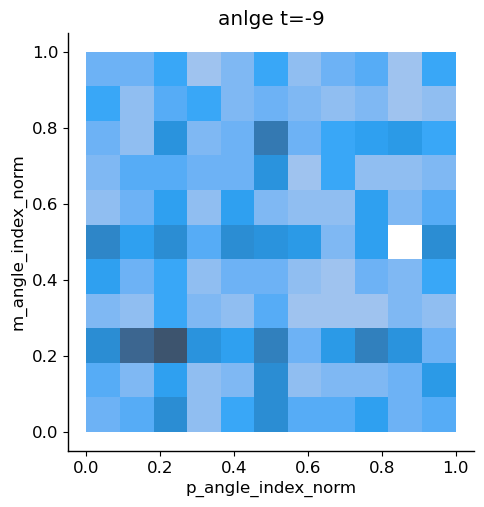

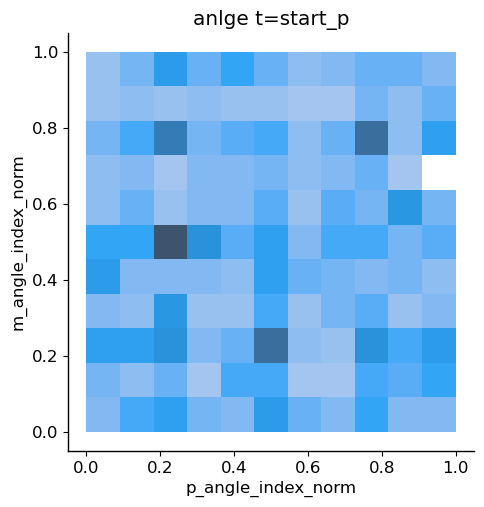

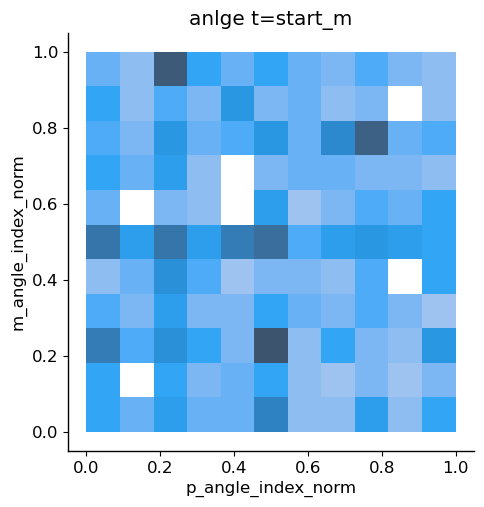

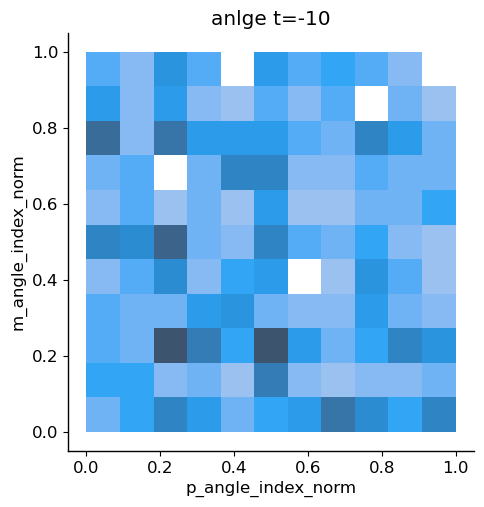

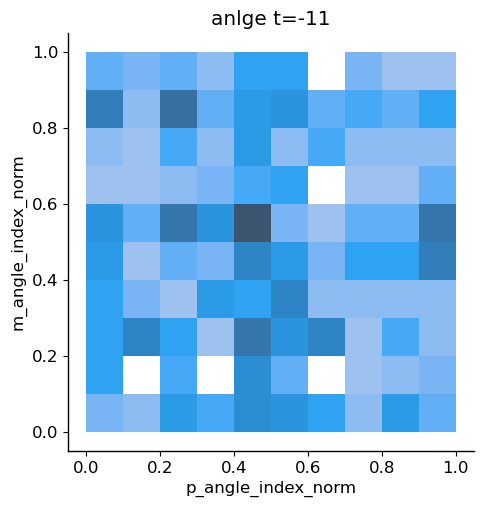

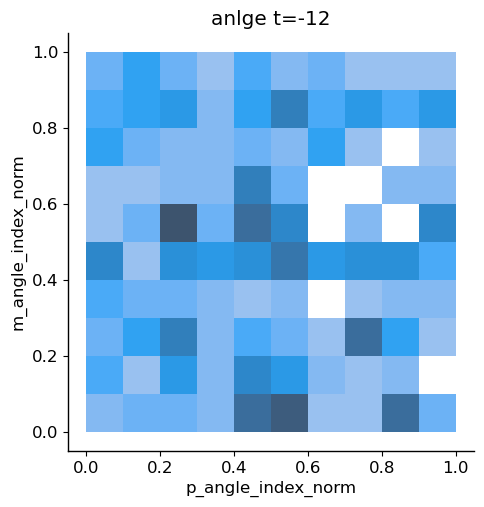

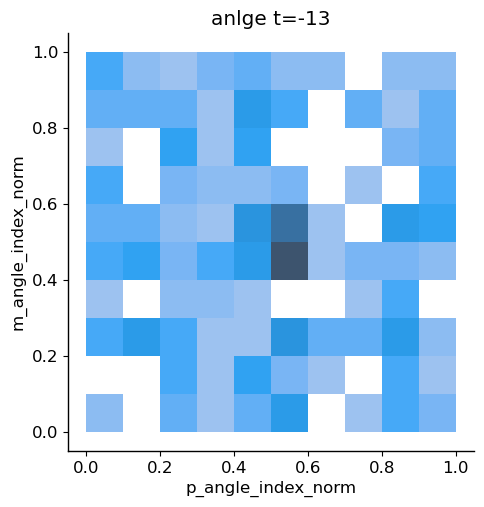

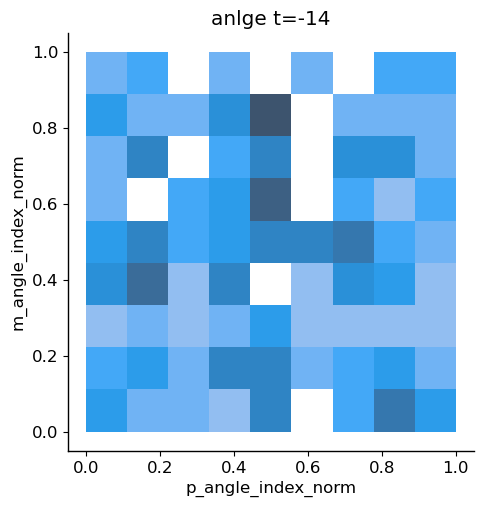

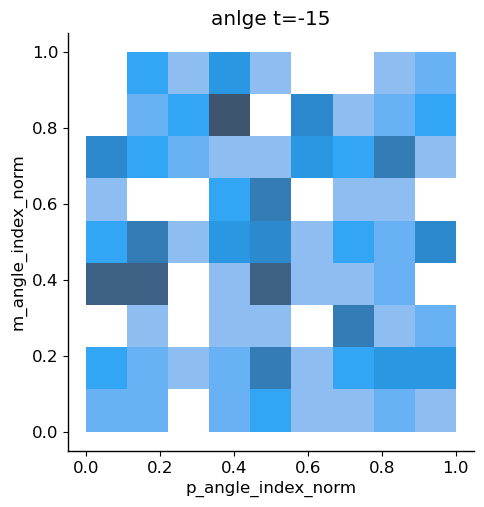

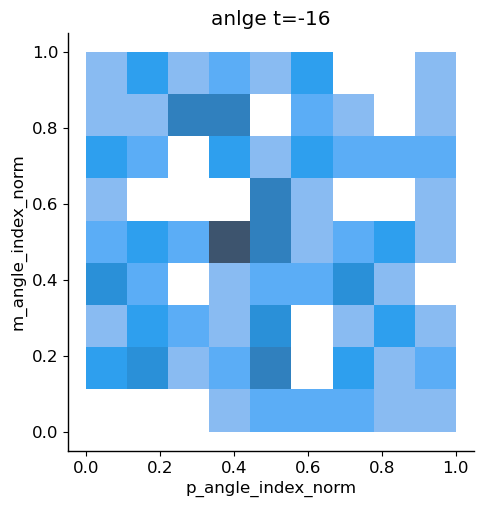

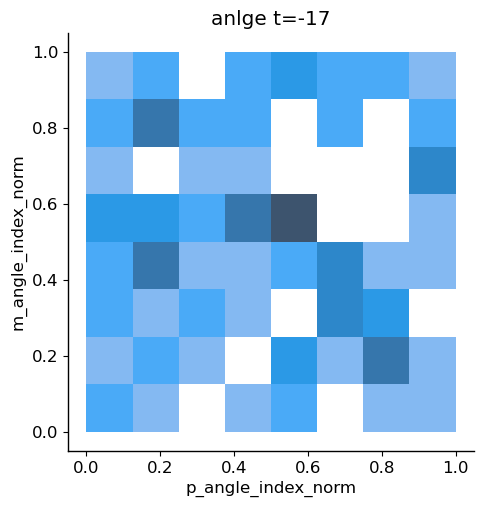

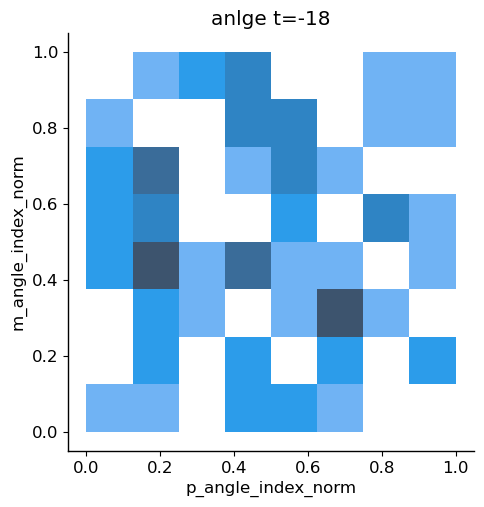

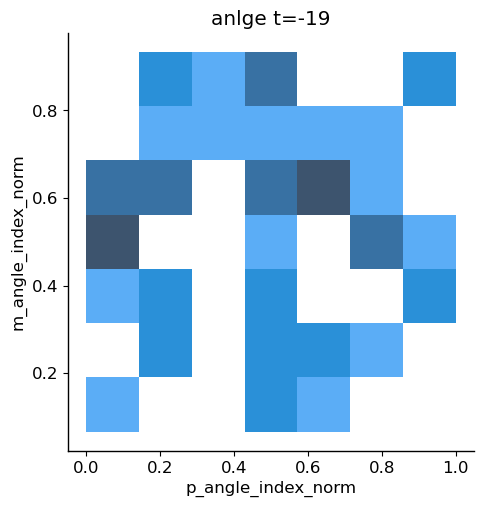

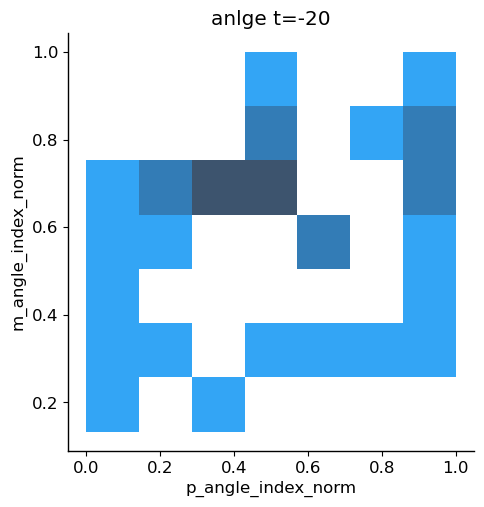

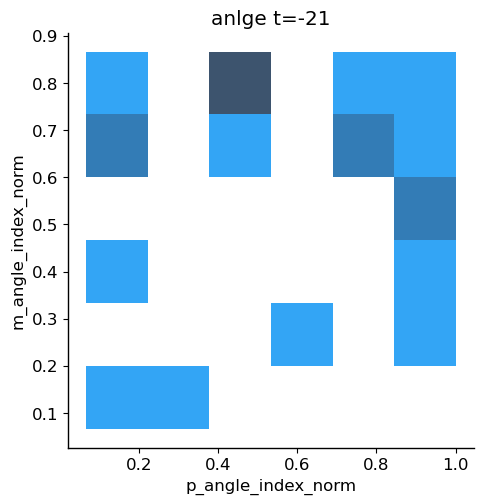

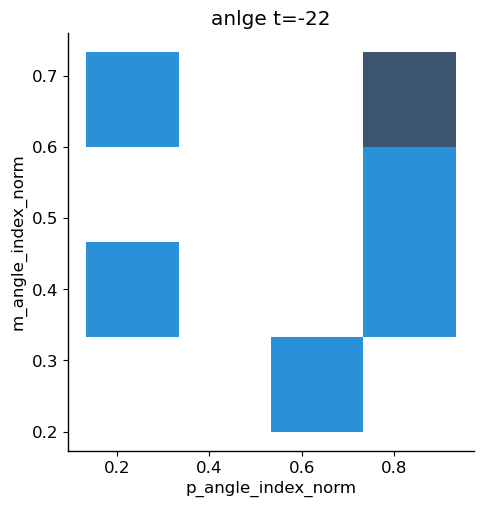

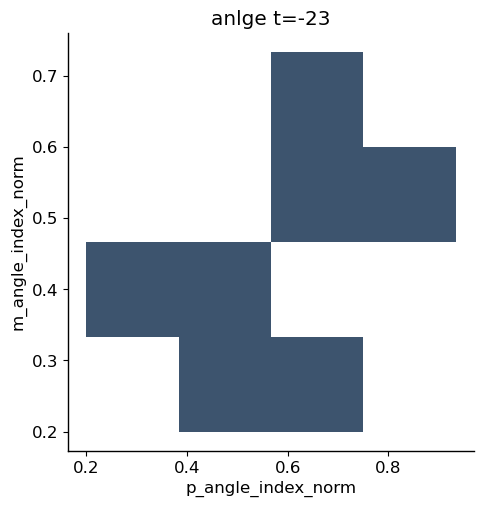

In [51]:
for k in all_time.keys():
    all_obj = all_time[k]
    all_obj = all_obj.reset_index(drop=True)
    all_obj["p_angle_index_norm"] = norm_angle_index(all_obj["p_angle_index"])
    all_obj["m_angle_index_norm"] = norm_angle_index(all_obj["m_angle_index"])
    # all_obj["p_angle_index_norm"] = norm_angle_index(all_obj["p_angle_index"])
    # all_obj["m_angle_index_norm"] = norm_angle_index(all_obj["m_angle_index"])
    
    sns.displot(x=all_obj.p_angle_index_norm, y=all_obj.m_angle_index_norm)
    plt.title(f"anlge t={k}")
    plt.savefig('index_pairs_'+k+'.svg')

/home/wd/miniconda3/envs/deepyeast/lib/python3.9/site-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


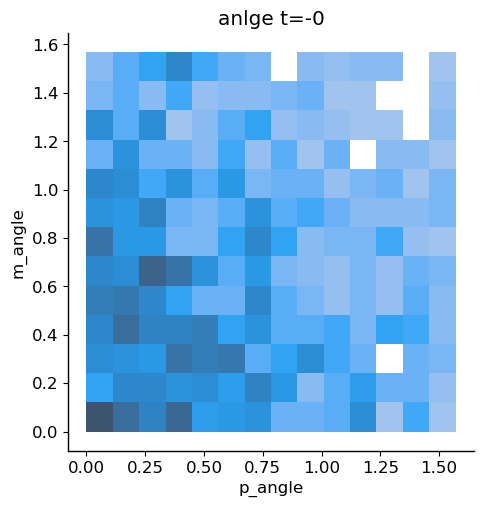

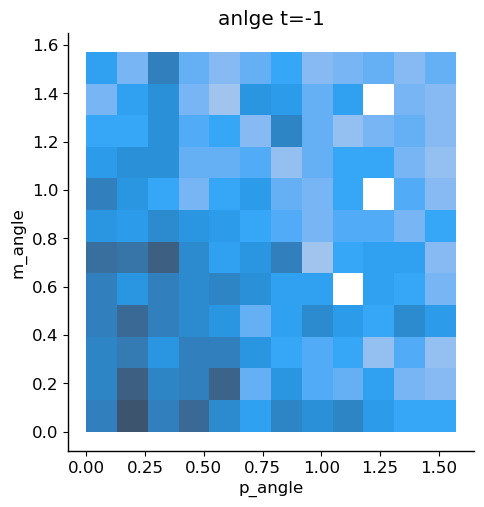

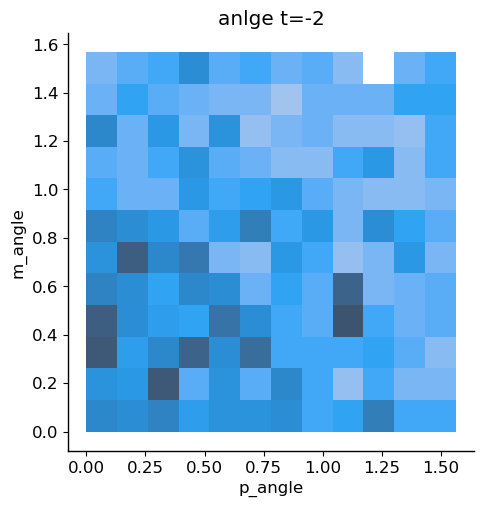

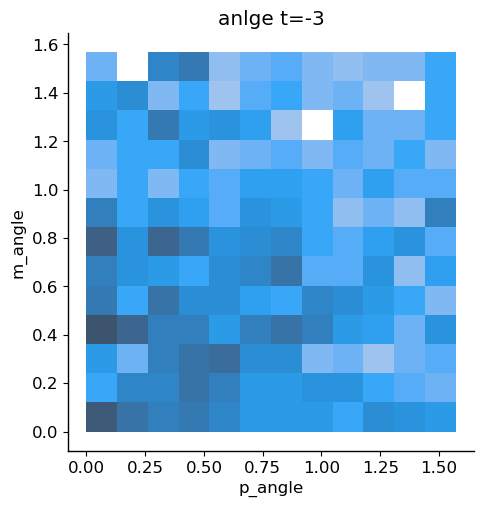

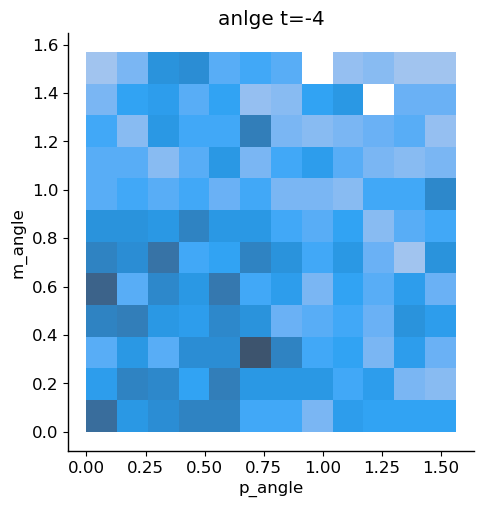

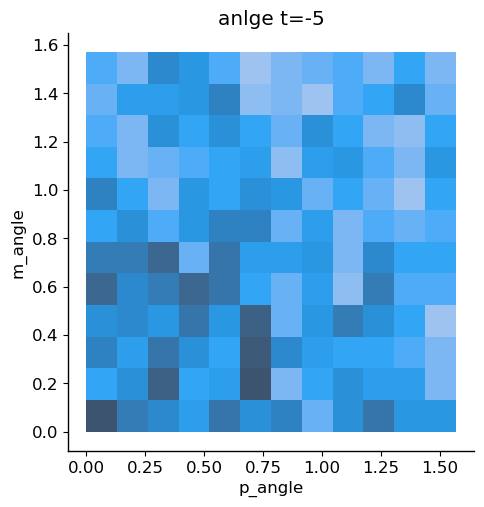

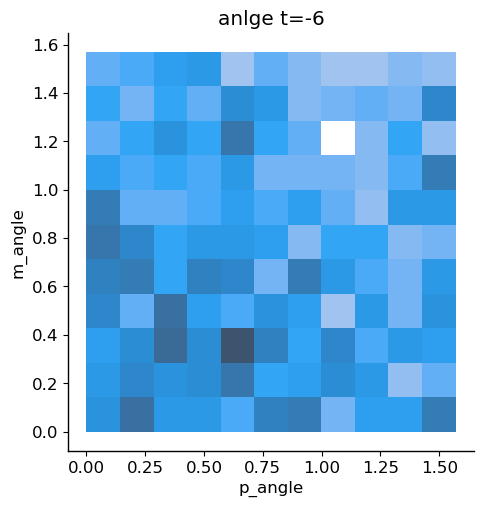

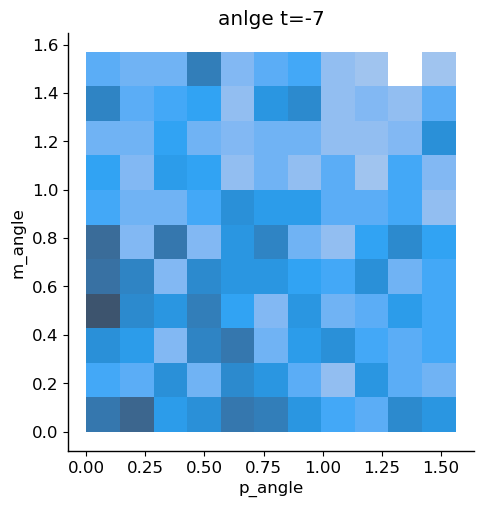

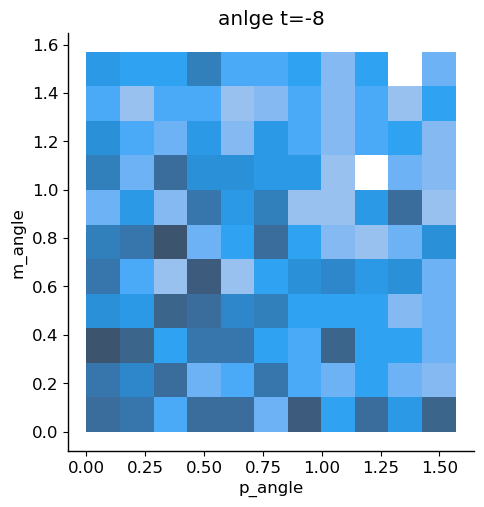

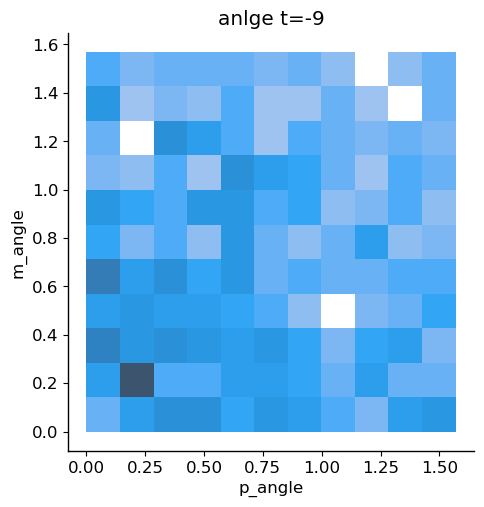

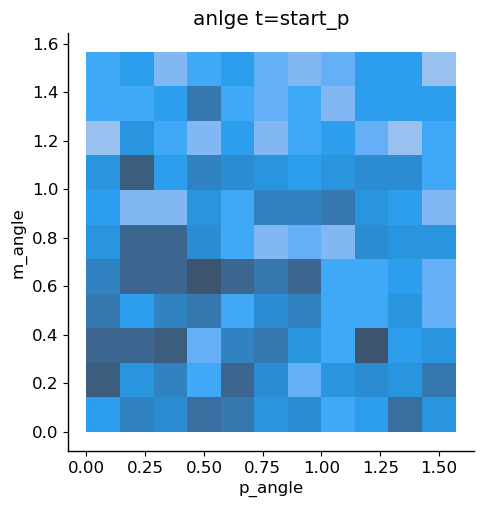

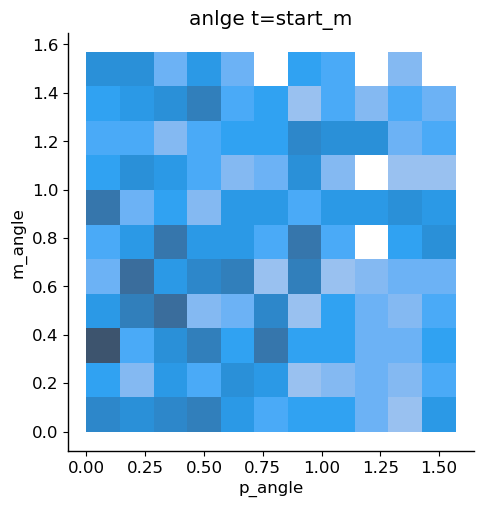

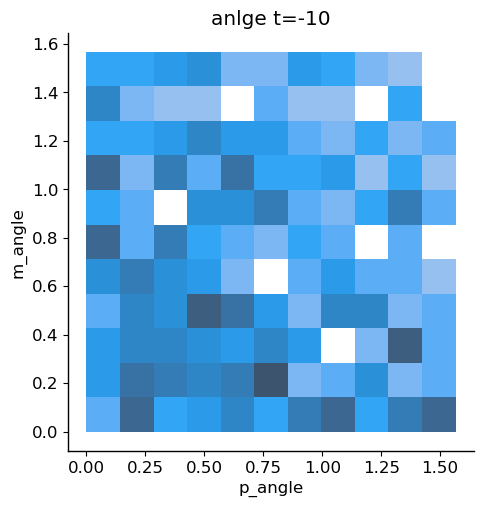

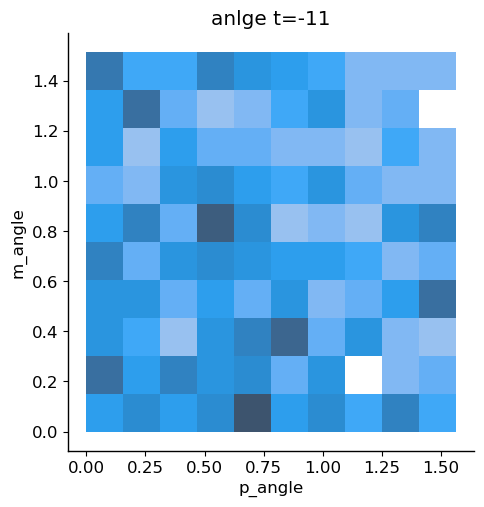

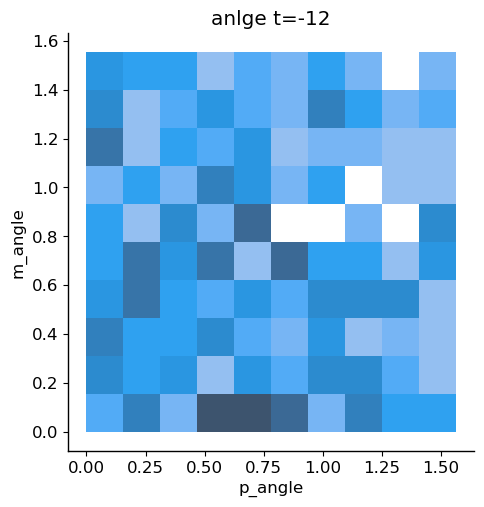

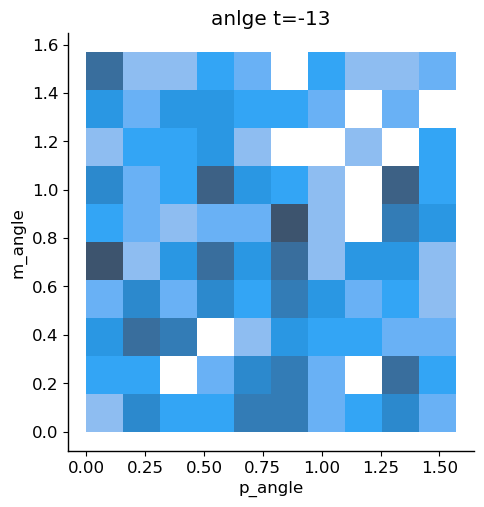

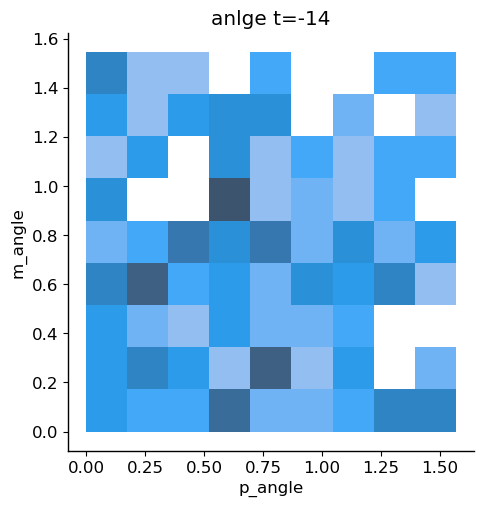

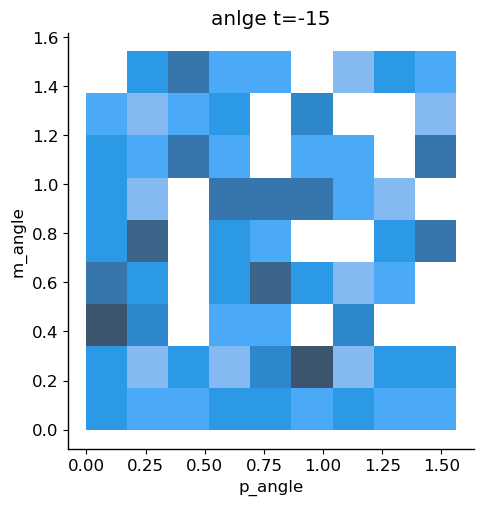

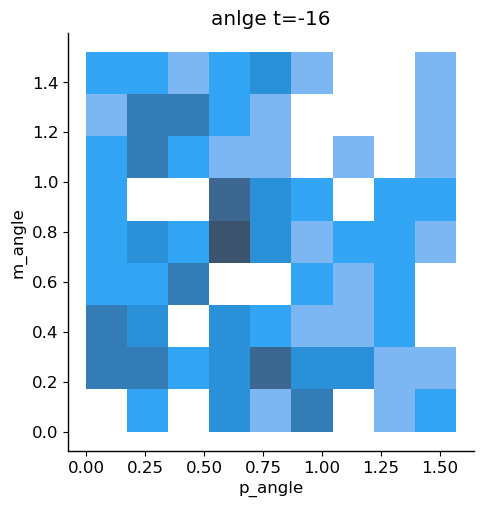

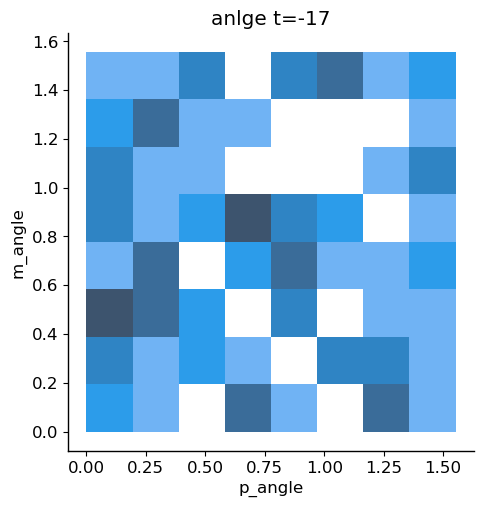

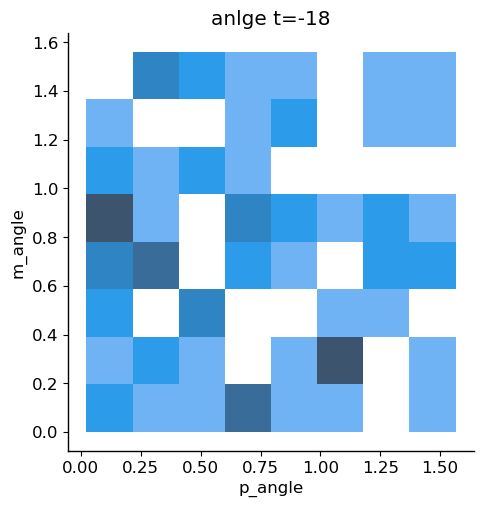

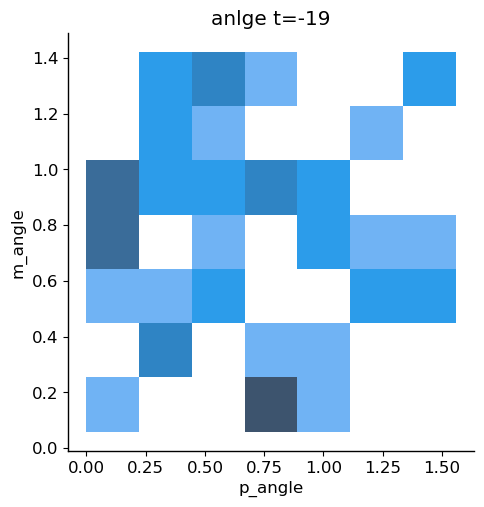

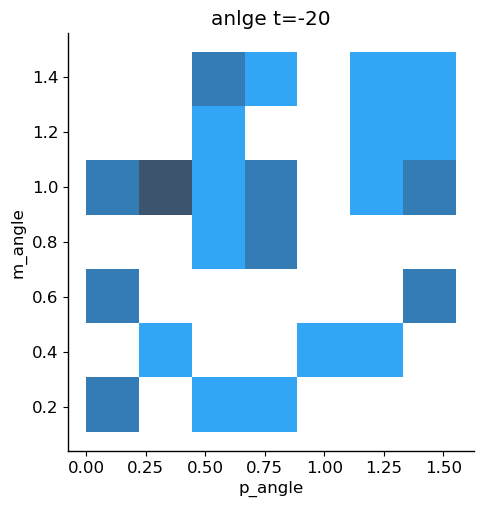

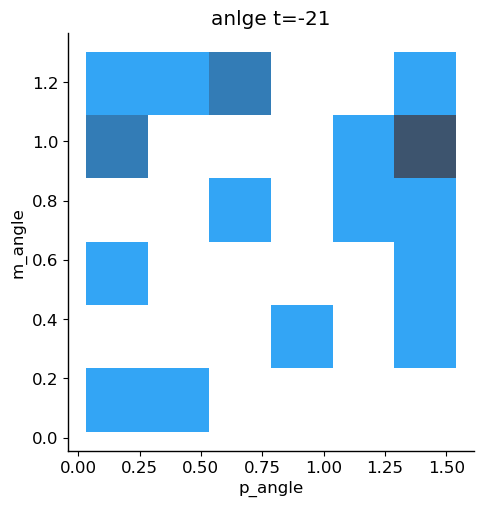

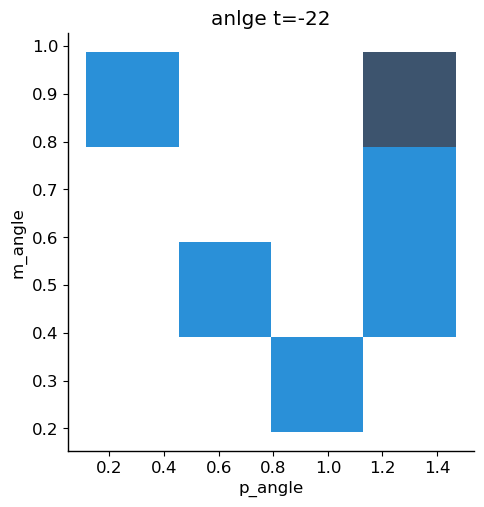

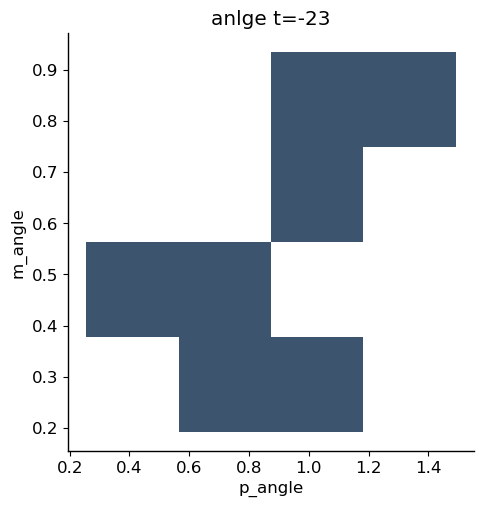

In [45]:
for k in all_time.keys():
    all_obj = all_time[k]
    all_obj = all_obj.reset_index(drop=True)
    
    # all_obj["p_angle_index_norm"] = norm_angle_index(all_obj["p_angle_index"])
    # all_obj["m_angle_index_norm"] = norm_angle_index(all_obj["m_angle_index"])
    
    sns.displot(x=all_obj.p_angle, y=all_obj.m_angle)
    plt.title(f"anlge t={k}")
    plt.savefig('angle_pairs_'+k+'.svg')

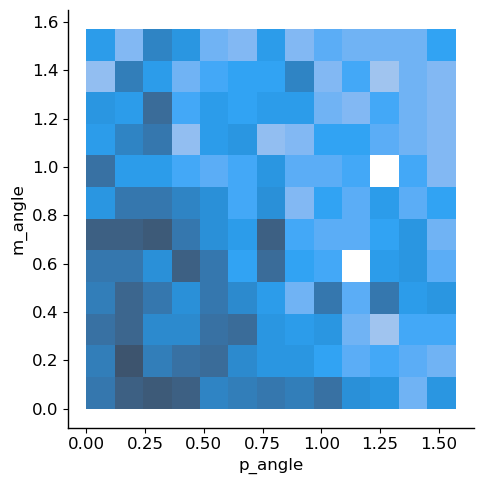

In [60]:
sns.jointplot(angles, x='p_angle', y='m_angle', hue='flag')

NameError: name 'angles' is not defined

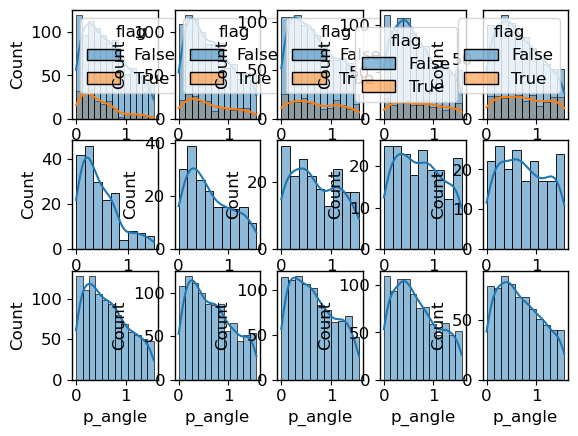

In [130]:
fig, axs = plt.subplots(3, len(all_data))

for i,k in enumerate(all_data.keys()):
    data = all_data[k]
    sns.histplot(data, x = 'p_angle', hue='flag', kde=True, ax=axs[0, i])
    sns.histplot(data[data.flag].p_angle, kde=True, ax=axs[1, i])
    sns.histplot(data[~data.flag].p_angle, kde=True, ax=axs[2, i])
    axs.set_title()

In [134]:
(all_data['end'].p_angle < np.pi/6).sum() / all_data['end'].shape[0]

0.48894348894348894

/home/wlli/miniconda3/envs/yeast/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/wlli/miniconda3/envs/yeast/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


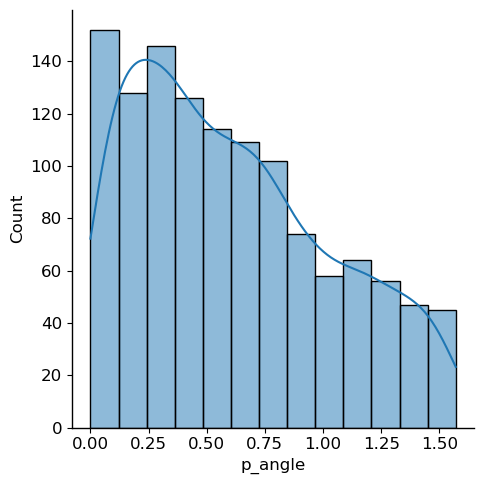

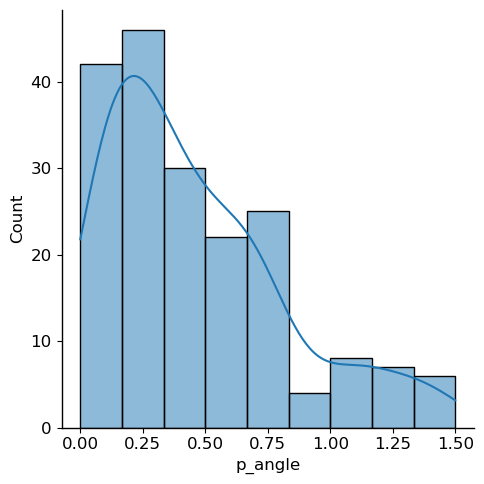

In [121]:
sns.displot(data.p_angle, kde=True)
sns.displot(data[data.flag].p_angle, kde=True)

In [745]:
data

Deviation  patch_angle  patch_time  neighbor_angle  neighbor_distance  \
0         6.0     0.135593    0.803627        0.033898           0.904109   
1         1.0     0.559322    6.118553        0.542373           2.500880   
2         6.0     0.830508    1.063778        0.932203           0.935246   
3         1.0     0.949153    1.909882        0.932203           0.935246   
0         1.0     0.559322   17.391915        0.542373           2.500880   
..        ...          ...         ...             ...                ...   
0         2.0     0.033898  231.146438        0.067797           1.279457   
0         2.0     0.033898  181.321998        0.067797           1.279457   
0         1.0     0.322034   13.858817        0.305085           1.469593   
0         1.0     0.322034   11.103980        0.305085           1.469593   
0         0.0     0.305085   10.902320        0.305085           1.469593   

    top_patch  top_neiber  timepoint  \
0         8.0         2.0          0   
1        33.0        32.0          0   
2        49.0        55.0          0   
3        56.0        55.0          0   
0        33.0        32.0          1   
..        ...         ...        ...   
0         2.0         4.0          0   
0         2.0         4.0          1   
0        19.0        18.0          0   
0        19.0        18.0          1   
0        18.0        18.0          2   

                                             filename  
0   /media/wd/T7/data/dynamic/20230828/selected/1/...  
1   /media/wd/T7/data/dynamic/20230828/selected/1/...  
2   /media/wd/T7/data/dynamic/20230828/selected/1/...  
3   /media/wd/T7/data/dynamic/20230828/selected/1/...  
0   /media/wd/T7/data/dynamic/20230828/selected/1/...  
..                                                ...  
0   /media/wd/T7/data/dynamic/20230828/selected/2/...  
0   /media/wd/T7/data/dynamic/20230828/selected/2/...  
0   /media/wd/T7/data/dynamic/20230828/selected/2/...  
0   /media/wd/T7/data/dynamic/20230828/selected/2/...  
0   /media/wd/T7/data/dynamic/20230828/selected/2/...  

[1592 rows x 9 columns]

In [767]:
data = pd.read_csv("../cellmating/run/csv/dynamic_patch_neiber_distance_index_all_time_point.csv", index_col=0)

In [768]:
data.Deviation.max()

26.0

In [769]:
data.loc[data['Deviation']>15, 'Deviation'] = 30 - data[data['Deviation']>25].Deviation

/home/wd/miniconda3/envs/yeast/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


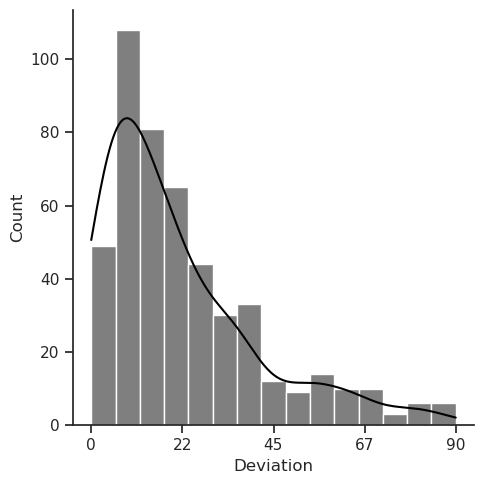

In [778]:
sns.displot(data[data.timepoint==0]['Deviation'], kde=True, color="black")
x_range = np.linspace(0,15,5)
x_range_label = x_range/15*90
x_range_label = [f"{int(i)}" for i in x_range_label]
plt.xticks(x_range, x_range_label)
# plt.title("patch vs neighbor")
plt.savefig("./data/saved_figures/patch_vs_neighbor.svg")
plt.show()

In [755]:
colors_list = [(202, 58, 32),(241, 165, 58), (249, 222, 75),(247, 240, 220), (135, 235, 233),(151, 200, 233),]

In [756]:
colors_list = [(151, 200, 233), (135, 235, 233), (247, 240, 220), (241, 165, 58),(202, 58, 32)]
colors_gaudi_list=[]
for a,b,c in colors_list:
    colors_gaudi_list.append((a/255,b/255,c/255))
COLOR_Gaudi_line = mpl.colors.LinearSegmentedColormap.from_list("", colors_gaudi_list)
COLOR_Gaudi_line

NameError: name 'mpl' is not defined

/home/wd/miniconda3/envs/yeast/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/wd/miniconda3/envs/yeast/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


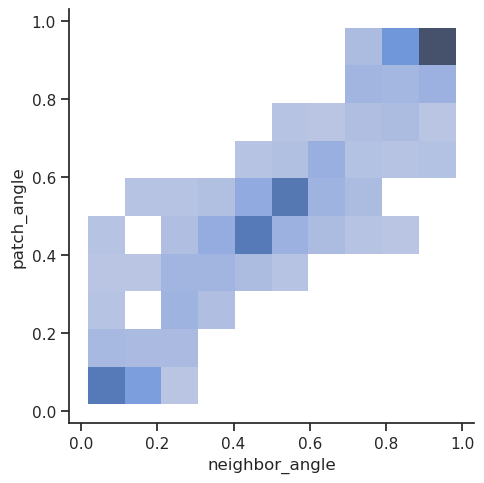

In [759]:
sns.displot(data[data.timepoint==0],x='neighbor_angle', y='patch_angle')
# plt.savefig("./figs/patch_vs_neighbor_heatmap.svg")